# Modelling NFL Statistics to Create a Virtual Interactive Gambling Model 
###### John Reed

### Import the necessary libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.metrics import mean_squared_error
import os
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

### 1. Introduction
### 2. The Data
#### 2.1 Description of Data and Significant Variables  
#### 2.2 Data Cleaning
### 3. Variable Selection and Exploratory Analysis
#### 3.1 Analysis of the Dependent Variable
#### 3.2 Removal of Variables that drive the model
#### 3.3 Weather Variable
#### 3.4 Correlation Matrixes
#### 3.5 Scatterplots and Distributions 
#### 3.6 Creating the Initial Model
### 4. Model Validation and Diagnostics
#### 4.1 Test for Linearity 
#### 4.2 Outliers
#### 4.3 Test for Normality 
#### 4.4 Constancy of Variance
#### 4.5 Test for Independence
#### 4.6 Multicollinearity 
### 5. Models Created Using Selected Variables
#### 5.1 Model 1 
#### 5.2 Model 2
#### 5.3 Model 3
#### 5.4 Coefficient Analysis
### 6. Results
#### 6.1 Evaluation of MSE's
#### 6.2 Model Vs. Vegas
#### 6.3 Betting Results
#### 6.4 Analysis of Betting Results
### 7. Conclusion 



## 1. Introduction:

The primary objective of this project is to develop an interactive betting model capable of predicting various metrics in the National Football League (NFL). Although the dataset is versatile and can be adjusted to forecast a range of variables, this project will specifically focus on predicting the final scores of NFL games. This endeavor involves leveraging advanced statistical techniques and machine learning algorithms, specifically linear regression, to analyze historical game data and make accurate predictions, ultimately aiding in betting decisions.


## 2. The Data

#### 2.1 Description of Data and Significant Variables

The dataset contains various variables that capture key aspects of American football, specifically within the NFL. The data was collected by combining statistics from both the ESPN website and Pro-Football-Reference.com to ensure that all crucial factors influencing NFL games were included. Before describing the variables, here is a brief overview of the game's rules.

#### Rules:
The NFL, established in 1920, is the professional American football league in the United States, comprising 32 teams divided into two conferences: the American Football Conference (AFC) and the National Football Conference (NFC). Each NFL game consists of four quarters, each lasting 15 minutes, with a halftime break after the second quarter. If the game is tied at the end of regulation, it proceeds to overtime, which has specific rules to determine the winner.

#### Scoring in the NFL
Points in an NFL game can be scored in several ways:

- Touchdown (6 points): Achieved when a team carries or catches the ball in the opponent's end zone.
- Extra Point (1 point): Attempted after a touchdown, where the team kicks the ball through the opponent's goalposts from the 15-yard line.
- Two-Point Conversion (2 points): Instead of an extra point, a team can attempt to get the ball into the end zone again from the two-yard line.
- Field Goal (3 points): Scored by kicking the ball through the opponent's goalposts during a play from scrimmage.
- Safety (2 points): Occurs when the offensive team is tackled in their own end zone or commits certain fouls in their end zone.

#### The Downs System:
The downs system is a fundamental aspect of NFL gameplay, dictating how the offensive team advances the ball and maintains possession. The offense has four downs (plays) to move the ball at least 10 yards down the field. If they succeed, they earn a new set of four downs. If they fail to gain 10 yards after four downs, possession of the ball is turned over to the opposing team.

- First Down: The initial attempt to advance the ball. If the team gains 10 or more yards, they receive a new set of downs.
- Second Down: The second attempt if the team did not gain 10 yards on the first down.
- Third Down: The third attempt, which often determines whether the team will attempt a riskier play to gain the remaining yards.
- Fourth Down: The final attempt. If the team is close to the required 10 yards, they might attempt to convert. Otherwise, they typically punt the ball to the opposing team or attempt a field goal if within range.

#### The Role of the Quarterback
In American football, the quarterback (QB) is one of the most critical positions on the field. The quarterback is often seen as the leader of the offense, responsible for directing plays, making strategic decisions, and executing passes. The QB stands behind the offensive line and receives the ball from the center to start each play. Their primary duties include:

- Passing: Throwing the ball to receivers, running backs, or tight ends to advance down the field.
- Rushing: Occasionally running with the ball themselves to gain yardage.
- Play Calling: Making quick decisions on which play to execute based on the defensive setup.

Understanding these rules and the scoring system is crucial for building an accurate predictive model, as they form the basis for how game outcomes are determined. 

---

#### Variables

#### Key Variables
Rather than explaining every variable in the dataset, I will outline the ten most significant variables selected for our model based on careful consideration.

- 'Score' – The dependent variable representing the total points accumulated by a team during the game.

- 'Total Drives' – Represents the number of possessions a team has. When one team’s offense is on the field, the opposing team’s defense is present, attempting to prevent scoring. A 'Drive' refers to an offensive possession.

- 'Passing Yards' – The total number of yards thrown by the quarterback during the game.

- 'Rushing Yards' – Similar to passing yards, but this variable represents the number of yards gained by running with the ball rather than throwing it.

- 'Turnovers' – Denotes the number of times a team loses possession. Turnovers include interceptions and fumbles, both of which are recorded separately but summed to create the 'Turnovers' variable.

- 'Sacks' – The number of times the quarterback is tackled while in possession of the ball, resulting in a loss of a down.

- 'Punts' – A punt is a kick that gives possession to the opposing team. The goal of punting is to ensure that the opposing team starts their possession (or 'Drive') as far away from the punting team’s goal as possible. Teams typically punt when they fail to gain the necessary yardage on their downs.

- '3rd Downs Converted' – A team has four attempts to gain 10 yards. The third attempt is called a third down. If unsuccessful, the team must either punt the ball or attempt to convert on fourth down. This variable indicates how many third downs a team successfully converts.

- '3rd Downs Attempted' – The total number of third-down attempts a team makes.

- '4th Downs Attempted' – The number of times a team attempts to convert on fourth down.

- '4th Downs Converted' – The number of fourth-down attempts successfully converted by a team. Playing on fourth down is risky, as failure to convert allows the opposing team to take possession near the failed attempt's location.

These are the key variables that will be included in our final model.


## 2.2 Data Cleaning

- The dataset contains no missing values and comprises 570 observations, representing a total of 285 games from the season, including the postseason. Among these, 14 games proceeded to overtime. Overtime occurs when teams are tied at the end of regulation, resulting in additional playtime.

- Due to the extra time allocated to overtime games, these games contain additional data, which could introduce bias into the model and make it difficult to assess games fairly. To ensure the integrity of the model, observations related to overtime games were removed from the dataset. The exclusion of these 14 games resulted in the removal of 28 observations from the season’s data.

- Additionally, the 'Total Passing Yards' statistic was standardized. In football, the total passing yards typically include yards lost due to sacks. A sack occurs when the quarterback is tackled behind the line of scrimmage before they can throw a forward pass, resulting in a loss of yardage. To standardize the 'Passing Yards' column and provide a more accurate measure of a team's passing performance, the yardage lost due to sacks was added back to the 'Passing Yards' column. This adjustment ensures that the passing yardage reflects only the yards gained through passing plays, without penalizing teams for sack yardage lost. This standardization is crucial for maintaining consistency and accuracy in the dataset, thereby enhancing the reliability of the predictive model.

- Other variables also required standardization. "Pro-Football-Reference" provided two columns for yards per pass: one indicating 'Gross Yards' and another indicating 'Net Yards'. To maintain consistency, all standardized variables were used in the dataset.

- Initially, I was unaware of the correlation between 'Passer Rating' and multiple other variables. However, after analyzing the correlation matrix, I observed that 'Passer Rating' had strong correlations with several variables. Further research revealed that 'Passer Rating' is calculated using multiple metrics already included in the dataset. Including it in the model would introduce 'multicollinearity', which can distort regression results. Consequently, 'Passer Rating' was excluded from the model to prevent redundancy and ensure statistical validity.


## 3. Variable selection and Exploratory Analysis

### 3.1 Analysis of the Dependent Variable

/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


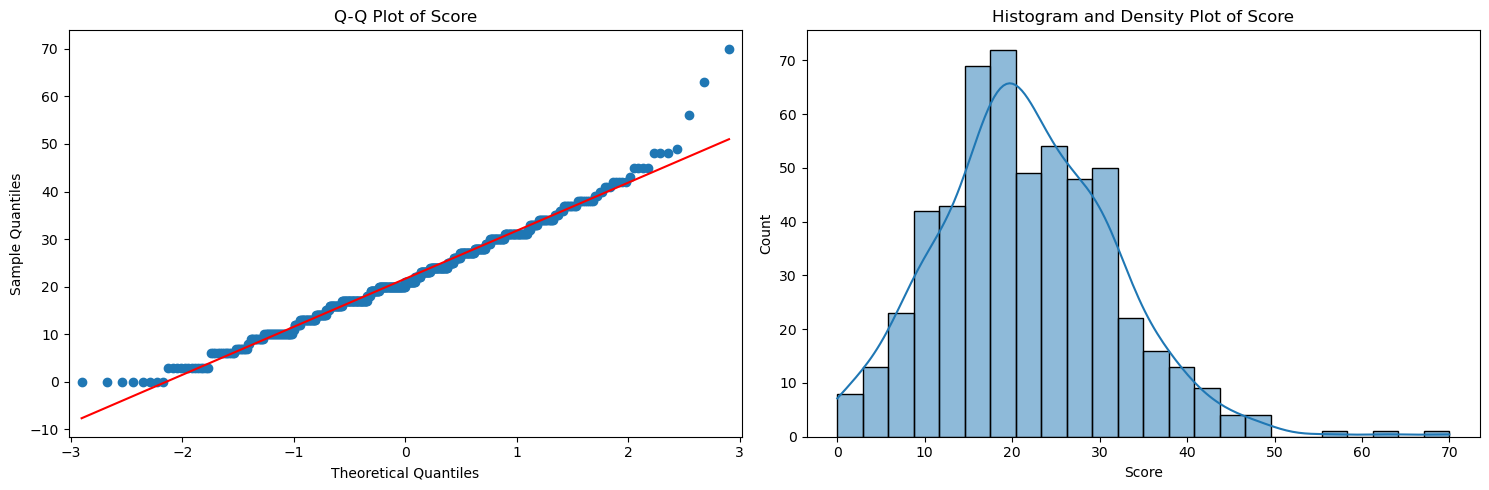

In [2]:
# Load the data
data = pd.read_csv('NFL{Defence}.csv')  # Assume this file includes all preprocessing steps done previously

# Define the dependent variable
y = data['Score']

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Q-Q plot
sm.qqplot(y, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot of Score')

# Histogram with KDE
sns.histplot(y, kde=True, ax=axes[1])
axes[1].set_title('Histogram and Density Plot of Score')

# Adjust layout
plt.tight_layout()
plt.show()


The Q-Q plot and histogram reveal that while scores generally follow a normal distribution, there are expected outliers and slight right skewness. These outliers reflect the inherent unpredictability of NFL games and will not be treated separately. Their presence reinforces the suitability of linear regression for predicting game scores. 

#### Initial model to inspect variables

In [3]:
# Load the data
data = pd.read_csv('NFL{Defence}.csv')

# Define the dependent variable
dependent_var = 'Score'

# Define the independent variables
independent_vars = data.columns.tolist()
independent_vars.remove(dependent_var)

# Line to exclude certain variables
# excluded_vars = ['Var1', 'Var2']  # Uncomment and replace with variables to exclude
# independent_vars = [var for var in independent_vars if var not in excluded_vars]

# Prepare the data for regression
X = data[independent_vars]
y = data[dependent_var]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     227.1
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.78e-296
Time:                        14:41:52   Log-Likelihood:                -1209.0
No. Observations:                 542   AIC:                             2504.
Df Residuals:                     499   BIC:                             2689.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### 3.2 Removal of scoring variables that drive model  

We can already see from this regression summary that the variables that directly involve scoreing completely drive the model.

Defensive/Special Teams TDs: Defensive/special teams touchdowns

Pass TDs: Passing touchdowns

Rush TDs: Rushing touchdowns

XPM: Extra points made

XPA: Extra points attempted

FGM: Field goals made

FGA: Field goals attempted

RZ ATT: Red zone attempts

RZ Conv: Red zone conversions

By removing these scoring variables, the model will be challenged to identify other influential factors that contribute to the final game scores, such as team performance metrics, player statistics, and situational factors. This approach enhances the model's ability to generalize from the data and improves its utility for making predictions in scenarios where direct scoring information is not available. The goal is to build a model that relies on indirect indicators and broader performance metrics, thereby offering more strategic insights for predicting NFL game outcomes. 

We can tell the model is currently depending on these variables based on the coefficients for these metrics. Notice tat the coefficient for 'FGM' which indicates Field Goals Made is 2.7189, this is nearly exactly equal to the value of a field goal which is three points.


#### 3.2 Removal of Scoring Variables That Drive the Model  

We can already see from this regression summary that the variables directly related to scoring completely drive the model.

- Defensive/Special Teams TDs: Defensive/special teams touchdowns  
- Pass TDs: Passing touchdowns  
- Rush TDs: Rushing touchdowns  
- XPM: Extra points made  
- XPA: Extra points attempted  
- FGM: Field goals made  
- FGA: Field goals attempted  
- RZ ATT: Red zone attempts  
- RZ Conv: Red zone conversions  

By removing these scoring variables, the model will be challenged to identify other influential factors that contribute to final game scores, such as team performance metrics, player statistics, and situational factors. This approach enhances the model's ability to generalize from the data and improves its utility for making predictions in scenarios where direct scoring information is not available. The goal is to build a model that relies on indirect indicators and broader performance metrics, thereby offering more strategic insights for predicting NFL game outcomes.  

We can tell the model is currently depending on these variables based on the coefficients for these metrics. Notice that the coefficient for 'FGM' (Field Goals Made) is 2.7189, which is nearly equal to the value of a field goal (three points).


In [4]:
data = pd.read_csv('NFL{Defence}.csv')  

# List of columns to exclude
columns_to_exclude = [
    'Defensive/Special Teams TDs', 'Pass TDs', 'Rush TDs',
    'XPM', 'XPA', 'FGM', 'FGA', 'RZ ATT', 'RZ Conv'
]

#  'Score' is  the dependent variable and all other columns are independent variables

X = data.drop(columns=columns_to_exclude + ['Score'])  
y = data['Score']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          7.07e-138
Time:                        14:41:56   Log-Likelihood:                -1629.0
No. Observations:                 542   AIC:                             3326.
Df Residuals:                     508   BIC:                             3472.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15

We can see the immediate effect removing these vriables has on the R^2

### 3.3 Weather

#### Weather

I initially wanted to create a Weather variable because simply calculating the averages of different weather types in the overall data we can clearly see that there is a discrepancy in the dependent variable 'Score'. I tried multiple ways to try and get the model to recognize the variable but it was never selected as significant. This is the code I tried to implement.


Overall average: 21.9 points per game (ppg)

Clear, cloudy, overcast: 22.56 ppg

Rain: 19.275 ppg

Snow: 17.1 ppg (3 observations)

Wind: 18.869 ppg

Wind with rain or snow: 17.1 ppg

#### Weather

I initially wanted to create a Weather variable because, by simply calculating the averages of different weather conditions in the overall dataset, we can clearly see a discrepancy in the dependent variable 'Score'. I tried multiple methods to get the model to recognize the variable, but it was never selected as significant. Below is the code I attempted to implement:

- Overall average: 21.9 points per game (ppg)  
- Clear, cloudy, overcast: 22.56 ppg  
- Rain: 19.275 ppg  
- Snow: 17.1 ppg (3 observations)  
- Wind: 18.869 ppg  
- Wind with rain or snow: 17.1 ppg  


#### Wthr

I joined the variables 'Wind' and 'Weather'together to make a new overall weather variable. I will split it into categories and use one-hot encoding to make dummy variables. the new variable will be coded;

- 0 = clear,cloudy,overcast

- 1=rain

- 2=snow

- 3= windy (13>)

- 4 = windy + (either snow or rain)

This code was implemented to create the dummy variables

In [5]:
# Load the data
data = pd.read_csv('NFL{Defence}.csv')

# Handling missing values in 'Wthr' by filling with the mode (most frequent value)
data['Wthr'].fillna(data['Wthr'].mode()[0], inplace=True)

# One-hot encoding the 'Wthr' column
wthr_dummies = pd.get_dummies(data['Wthr'], prefix='Wthr')

# Join the dummy variables with the original dataframe
data = pd.concat([data, wthr_dummies], axis=1)

# Convert all Boolean columns to integers (0 for False, 1 for True)
# Assuming you know the columns or detect them automatically if they are dtype 'bool'
for col in data.select_dtypes(include=['bool']).columns:
    data[col] = data[col].astype(int)

#drop the original 'Wthr' column if it's no longer needed
data.drop('Wthr', axis=1, inplace=True)



# Save the modified dataframe to a new CSV file
data.to_csv('NFL{Defence}_modified.csv', index=False)


In [6]:
data = pd.read_csv('NFL{Defence}_modified.csv')  # Assume this file includes all preprocessing steps done previously

# List of columns to exclude
columns_to_exclude = [
    'Defensive/Special Teams TDs', 'Pass TDs', 'Rush TDs',
    'XPM', 'XPA', 'FGM', 'FGA', 'RZ ATT', 'RZ Conv'
]
X = data.drop(columns=columns_to_exclude + ['Score'])  
y = data['Score']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          7.07e-138
Time:                        14:42:01   Log-Likelihood:                -1629.0
No. Observations:                 542   AIC:                             3326.
Df Residuals:                     508   BIC:                             3472.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9

In [7]:
data = pd.read_csv('NFL{Defence}_modified.csv')  
y = data['Score']

# Define the independent variables explicitly based on the provided variable list
X = data[['Temp', 'Passing 1st', 'Rushing 1st', '1st_Penalties',
          'Total drives', 'YPP', 'Passing Yards', 'Interceptions', 'Fumbles', 'Turnovers',
          'Rushing', 'Rushing Att', 'YPR', 'Penalties', 'Yrds lost to penalties', 'Possestion',
          'Pass Att', 'Pass Completed', 'Sacks', 'Yards lost sacks', 'Passer rating',
          'Punts', 'Punt yards', '3rd dwns Conv', '3rd downs Att', '4th downs Conv',
          '4th downs Att', 'Momentum ', 'Wthr_0', 'Wthr_1', 'Wthr_2', 'Wthr_3', 'Wthr_4']]

def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Perform forward selection
selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

# Build the final model with selected features
model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(model.summary())


Selected features: ['Passer rating', 'Rushing', 'Passing Yards', 'Fumbles', 'Total drives', 'Punts', 'Sacks', 'Rushing 1st', 'Possestion', 'Passing 1st', '1st_Penalties', 'Pass Completed', '4th downs Conv', '4th downs Att']
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     113.3
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.07e-148
Time:                        14:42:03   Log-Likelihood:                -1646.0
No. Observations:                 542   AIC:                             3322.
Df Residuals:                     527   BIC:                             3386.
Df Model:                          14                                         
Covariance Type:            nonrobust                            

As we can see, the one-hot encoding did not select any 'Wthr' variables for the final model. Although this is frustrating, this approach made little sense for my project, as my main goal is to reduce the number of variables so I can train both large and smaller models based on each individual team. The introduction of extra variables is counterintuitive. I will attempt a few more approaches to include the weather variable before deciding to abandon it.



#### Model using 'wind binary' and 'weather binary' (0=clear 1= rain or snow)

In [8]:
# List of columns to exclude from the regression
columns_to_exclude = [
    'Defensive/Special Teams TDs', 'Pass TDs', 'Rush TDs',
    'XPM', 'XPA', 'FGM', 'FGA', 'RZ ATT', 'RZ Conv','Total_Weather_Binary ','Weather_Ord','Weather_Binary'
]

# Drop specified columns based on the list
X = data.drop(columns=columns_to_exclude + ['Score'], axis=1)  # Include 'Score' in the drop list as it's the dependent variable
y = data['Score']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          7.07e-138
Time:                        14:42:14   Log-Likelihood:                -1629.0
No. Observations:                 542   AIC:                             3326.
Df Residuals:                     508   BIC:                             3472.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12

In [9]:
data = pd.read_csv('NFL{Defence}.csv')  
y = data['Score']

# Define the independent variables explicitly
X = data[['Temp', 'Wind_Binary', 'Weather_O', 'Passing 1st', 'Rushing 1st', '1st_Penalties',
          'Total drives', 'YPP', 'Passing Yards', 'Interceptions', 'Fumbles', 'Turnovers', 
          'Rushing', 'Rushing Att', 'YPR', 'Penalties', 'Yrds lost to penalties', 'Possestion',
          'Pass Att', 'Pass Completed', 'Sacks', 'Yards lost sacks', 'Passer rating', 
          'Punts', 'Punt yards', '3rd dwns Conv', '3rd downs Att', '4th downs Conv', 
          '4th downs Att', 'Momentum ']]

def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


selected_features = forward_selection(X, y)
print("Selected features:", selected_features)


model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(model.summary())


Selected features: ['Passer rating', 'Rushing', 'Passing Yards', 'Fumbles', 'Total drives', 'Punts', 'Sacks', 'Rushing 1st', 'Possestion', 'Passing 1st', '1st_Penalties', 'Pass Completed', '4th downs Conv', '4th downs Att']
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     113.3
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.07e-148
Time:                        14:42:16   Log-Likelihood:                -1646.0
No. Observations:                 542   AIC:                             3322.
Df Residuals:                     527   BIC:                             3386.
Df Model:                          14                                         
Covariance Type:            nonrobust                            

Can see here that neither wind or weather was slected in the final model. We will try again using the new Binary variable

#### Model with Weather Binary (0 = Clear, Rain | 1 = Snow, Wind, Wind + Rain or Snow)

This variable was split this way because, after performing one-hot encoding, the only dummy variable selected as significant in a trial model was the Rain variable. I know this has the least effect on the total score on average. Additionally, it was not possible to determine whether the rain during a game was light or heavy. Therefore, I grouped rainy days into the better weather category alongside clear days, while games with both rain and wind were placed in the worse weather category.


In [10]:
columns_to_exclude = [
    'Defensive/Special Teams TDs', 'Pass TDs', 'Rush TDs',
    'XPM', 'XPA', 'FGM', 'FGA', 'RZ ATT', 'RZ Conv','Weather_O','Wind_Binary','Wthr','Weather_Ord','Weather_Binary'
]

X = data.drop(columns=columns_to_exclude + ['Score'], axis=1)  # Include 'Score' in the drop list as it's the dependent variable
y = data['Score'] 


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     57.35
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          8.31e-141
Time:                        14:42:19   Log-Likelihood:                -1630.4
No. Observations:                 542   AIC:                             3321.
Df Residuals:                     512   BIC:                             3450.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15

In [11]:
y = data['Score']

# Define the independent variables explicitly
X = data[['Temp', 'Total_Weather_Binary ', 'Passing 1st', 'Rushing 1st', '1st_Penalties', 
          'Total drives', 'YPP', 'Passing Yards', 'Interceptions', 'Fumbles', 'Turnovers', 
          'Rushing', 'Rushing Att', 'YPR', 'Penalties', 'Yrds lost to penalties', 'Possestion', 
          'Pass Att', 'Pass Completed', 'Sacks', 'Yards lost sacks', 'Passer rating', 
          'Punts', 'Punt yards', '3rd dwns Conv', '3rd downs Att', '4th downs Conv', 
          '4th downs Att', 'Momentum ']]

def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(model.summary())


Selected features: ['Passer rating', 'Rushing', 'Passing Yards', 'Fumbles', 'Total drives', 'Punts', 'Sacks', 'Rushing 1st', 'Possestion', 'Passing 1st', '1st_Penalties', 'Pass Completed', '4th downs Conv', '4th downs Att']
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     113.3
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.07e-148
Time:                        14:42:20   Log-Likelihood:                -1646.0
No. Observations:                 542   AIC:                             3322.
Df Residuals:                     527   BIC:                             3386.
Df Model:                          14                                         
Covariance Type:            nonrobust                            

can see again here that the variable was not selected.

#### Original Binary variable for weather 0= clear, 1= everything else

In [12]:
columns_to_exclude = [
    'Defensive/Special Teams TDs', 'Pass TDs', 'Rush TDs',
    'XPM', 'XPA', 'FGM', 'FGA', 'RZ ATT', 'RZ Conv','Weather_O','Wind_Binary','Wthr','Weather_Ord','Total_Weather_Binary ','Temp'
]

X = data.drop(columns=columns_to_exclude + ['Score'], axis=1)  

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     59.61
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          7.95e-142
Time:                        14:42:21   Log-Likelihood:                -1630.1
No. Observations:                 542   AIC:                             3318.
Df Residuals:                     513   BIC:                             3443.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -14

In [13]:
y = data['Score']

# Define the independent variables explicitly based on the provided variable list
X = data[['Weather_Binary', 'Passing 1st', 'Rushing 1st', '1st_Penalties', 
          'Total drives', 'YPP', 'Passing Yards', 'Interceptions', 'Fumbles', 'Turnovers', 
          'Rushing', 'Rushing Att', 'YPR', 'Penalties', 'Yrds lost to penalties', 'Possestion', 
          'Pass Att', 'Pass Completed', 'Sacks', 'Yards lost sacks', 'Passer rating', 
          'Punts', 'Punt yards', '3rd dwns Conv', '3rd downs Att', '4th downs Conv', 
          '4th downs Att', 'Momentum ']]

def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(model.summary())


Selected features: ['Passer rating', 'Rushing', 'Passing Yards', 'Fumbles', 'Total drives', 'Punts', 'Sacks', 'Rushing 1st', 'Possestion', 'Passing 1st', '1st_Penalties', 'Pass Completed', '4th downs Conv', '4th downs Att']
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     113.3
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.07e-148
Time:                        14:42:22   Log-Likelihood:                -1646.0
No. Observations:                 542   AIC:                             3322.
Df Residuals:                     527   BIC:                             3386.
Df Model:                          14                                         
Covariance Type:            nonrobust                            

None of the weather variables showed up as significant. I will continue with the original 'Weather_Binary' variable, as it had the lowest p-value.

#### Weather Ordinal

I also attempted to implement the weather variable as an ordinal category. This approach seemed logical since there is a distinction in average scores between different weather conditions. However, the model did not select it as significant, possibly because the majority of observations experienced no bad weather. For example, there were only three observations of snow.

Additionally, 11 current NFL teams play their games in domes, meaning they are unaffected by weather conditions. Since each of these teams plays 8–9 home games per season, approximately 94 games in the dataset were played in a dome. This accounts for nearly a third of the dataset, which likely explains why the model struggled to capture the impact of weather.

If one were particularly interested in modeling teams that play outdoors in varying weather conditions, a possible remedial approach would be to remove dome-game observations. This might allow the model to capture the effect of weather on game outcomes, or at the very least, provide a coefficient that could indicate its influence. However, I chose not to implement this strategy, as my goal was to gain insight into every team over the course of the season.


### 3.4 Correlation Matrixes

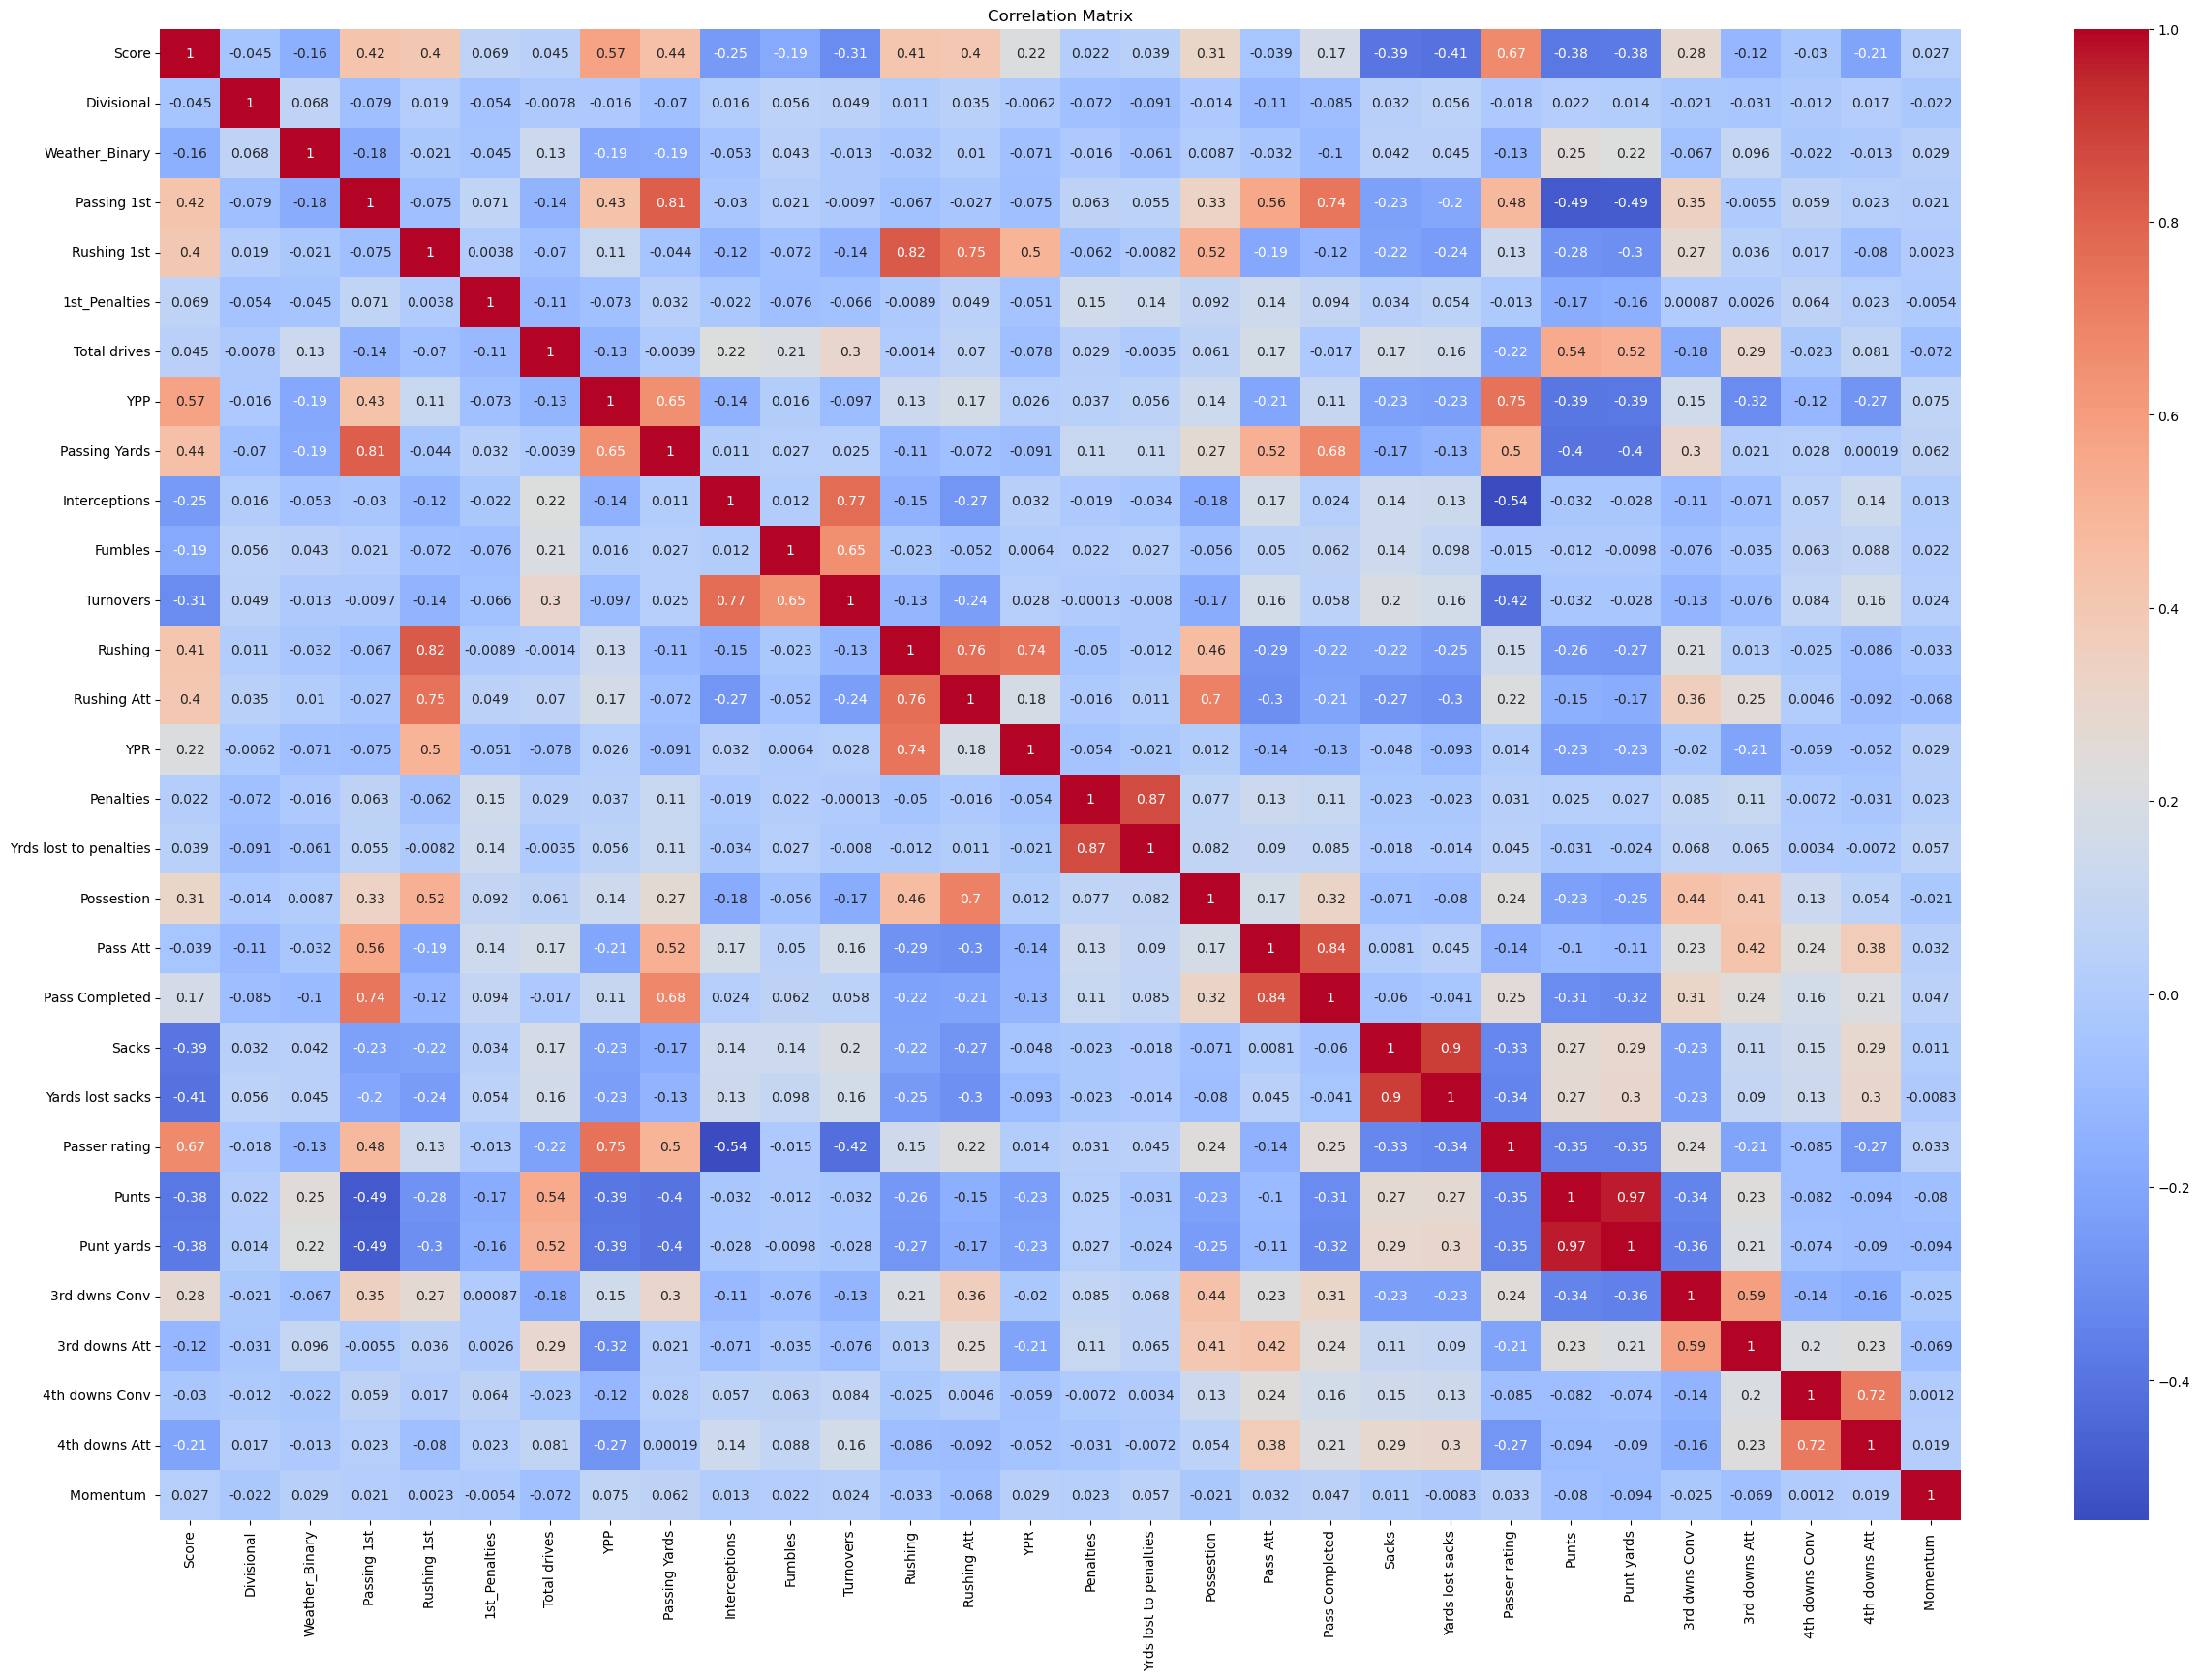

In [14]:
# Variables to exclude
variables_to_exclude = ['Defensive/Special Teams TDs','Pass TDs','Wind_Binary', 'Rush TDs', 'XPM', 'XPA', 'FGM', 'FGA',  'RZ ATT', 'RZ Conv','Weather_Ord','Total_Weather_Binary ','Wthr','Weather_O','Temp']

# Drop the variables to exclude
data_subset = data.drop(columns=variables_to_exclude)

# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Initial Correlation Issues

- We can see that '4th Downs Conv' is highly correlated with '4th Downs Att'. This is the same for the variables '3rd Downs Conv' and '3rd Downs Att'. I will leave these for now as I don't know which seems to be more important. Is it more important to have more attempts or to be efficient? It's possible both are significant. I would expect to see a negative coefficient for attempts and a positive coefficient for conversions.

- 'Punts' and 'Punt Yards' are highly correlated. I will remove the variable 'Punt Yards'. The important factor here is that when punting, you are giving the ball away to the other team. The distance punted is unimportant compared to the act of actually losing the ball.

- 'Sacks' and 'Yards Lost to Sacks' are highly correlated. I will eliminate 'Yards Lost to Sacks' as I assume the model will average out the number of yards lost per sack. The important thing here is that when sacked, the team loses a down. The team gets four downs to gain 10 yards to retain the ball, so being sacked is more significant than the distance lost, even though the distance is important.

- 'Rushing', which indicates total rushing yards, is highly correlated with 'Rushing 1st', 'YPR', and 'Rushing Attempted'. I want to delete 'Rushing Attempted' and 'YPR' as it's more important to consider the number of rushing yards obtained. However, I want the model to capture the percentage of plays passed and the percentage of plays rushed, as some teams pass and rush more than others. I think total rushing yards will explain YPP and rushing attempts, as the model can distinguish which teams rush the ball more based on their total rushing yards.

- 'Passing Yards' is highly correlated with 'Passing 1st', 'YPP' (yards per pass), 'Pass ATT', and 'Pass Completed'. It is understandable that these are highly correlated as they all keep track of the same metric. It is interesting to see that 'Passing Yards' is highly negatively correlated with 'Punts' and 'Punt Yards'. This makes sense, as the more you punt the ball, the fewer passing yards you may achieve due to the act of giving possession away. 'Passing Yards' and 'YPP' are highly correlated with the dependent variable at .44 and .57, respectively. This led me to cautiously follow the same steps as I did with the rushing variable, as YPP is more highly correlated with the dependent variable than 'Passing Yards'. I will remove 'YPP', as in dummy selection trials it was never selected, while 'Passing Yards' was. I will remove 'Pass ATT' and 'Pass Completed'.

- 'Penalties' and 'Yards Lost to Penalties' are highly correlated. Unlike the sack column, when a penalty is committed, teams don't lose a turn, they just lose yards. Either way, I will remove the 'Yards Lost to Penalties' variable with the understanding that the model will be able to capture the average yards lost per penalty from the 'Penalties' column. Both of these variables are not correlated with the dependent variable. Also, first downs from penalties are the real winners of these variables. This indicates when a team gets a first down because of a mistake made by the other team.

- I will remove the variables 'Fumbles' and 'Interceptions', as they sum to 'Turnovers' in the data.

- I will remove 'Rushing 1st' and 'Passing 1st' from this data. The number of first downs a team gets is important, as getting a first down retains possession of the ball. However, the objective is to move the ball down the field and score. A team can do this with one down or twenty downs. Therefore, I don't feel this helps the model. These variables are also extremely highly correlated with their respective predictors, 'Rushing' and 'Passing'.

- I came to the conclusion that 'Possession' should be removed from the model due to how correlated it is with other variables. Its data is captured by other variables such as total drives and total passing yards. Also, the time of possession seems to be reasonably centered, indicating that teams normally share the distribution of time on the ball. Another issue with the 'Possession' variable is that I would have expected a positive relationship. The longer a team has the ball, the more opportunities they have to score. This is not reflected in the original model, which has a negative coefficient. One can only assume that efficiency far outweighs time of possession.

- 'Temp' is removed as its data should be captured by 'Weather_Binary'. It is also not correlated with the dependent variable.

- Although an important metric for evaluating quarterback performance and highly correlated with the dependent variable at .67, the 'Passer Rating' variable will be removed. It is calculated using a formula that involves several other variables, so its multicollinearity is expected to be very high. The formula for this variable is in the Word file attached to this project.



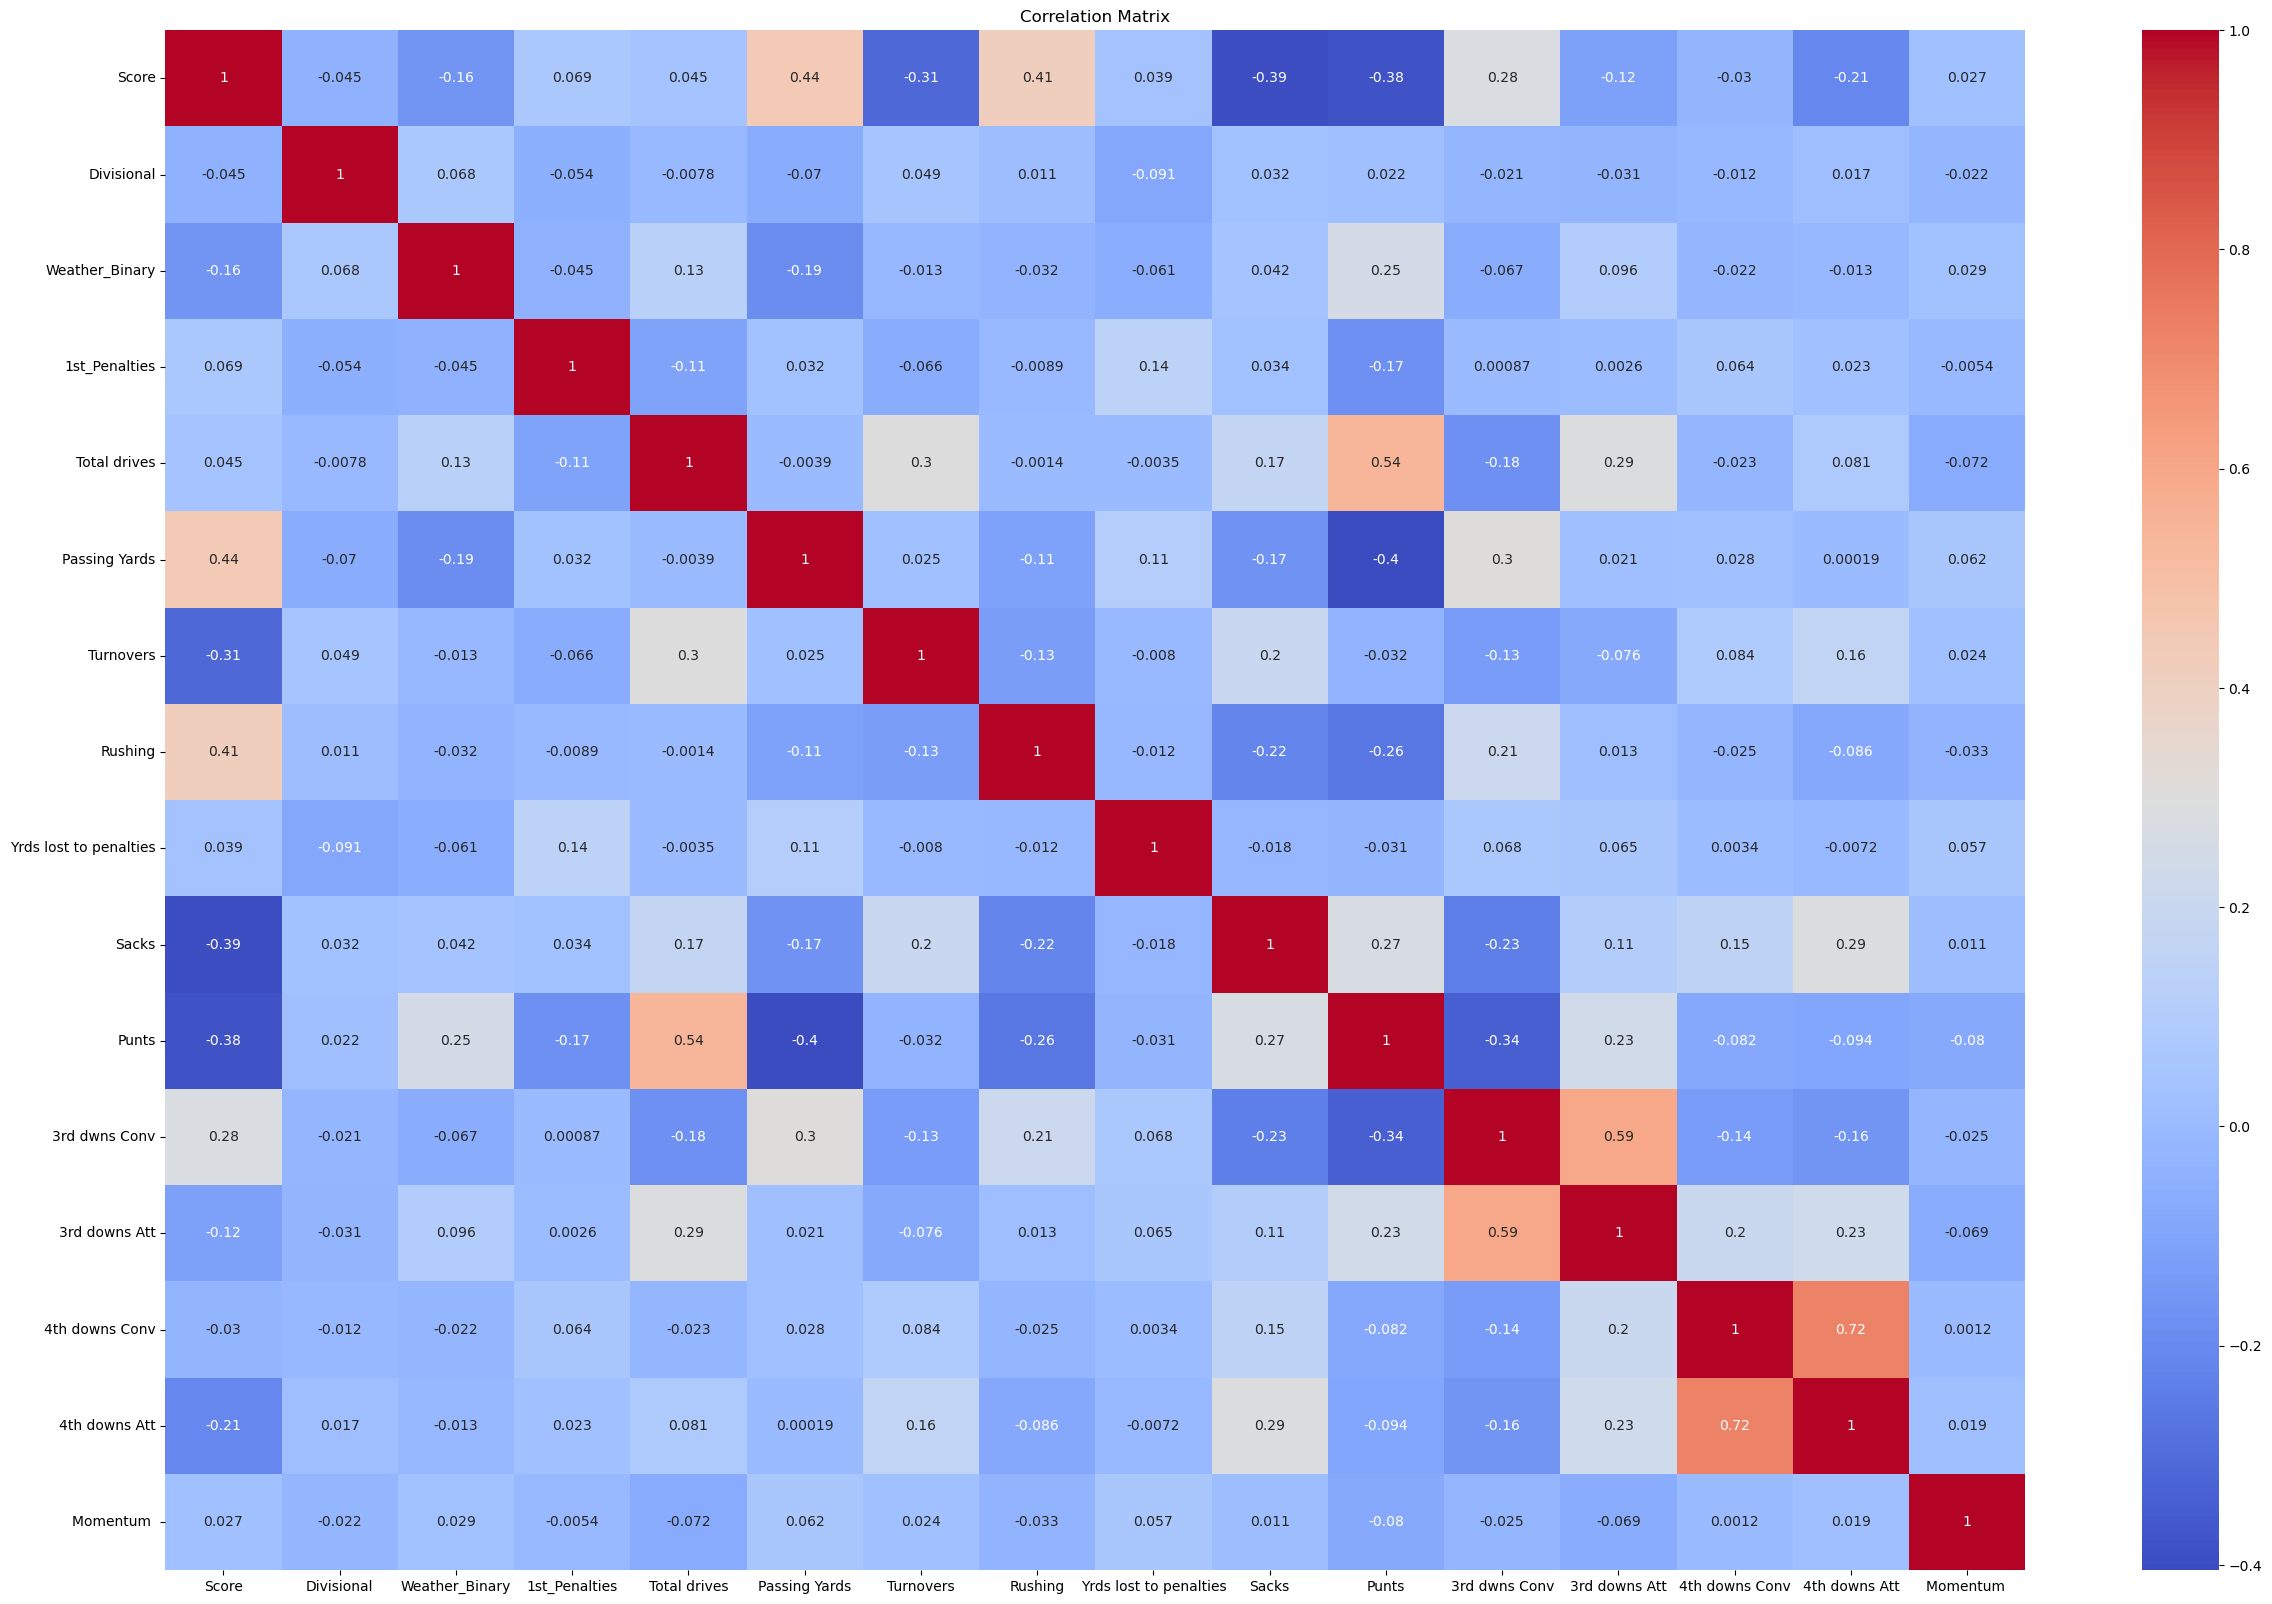

In [15]:
variables_to_exclude = ['Defensive/Special Teams TDs','Pass TDs','Wind_Binary', 'Rush TDs', 'XPM', 'XPA', 'FGM', 'FGA',  'RZ ATT', 'RZ Conv','Weather_Ord','Total_Weather_Binary ','Wthr','Weather_O','Temp','Rushing 1st','Passing 1st','Punt yards','Yards lost sacks','Penalties','Rushing Att','YPR','Pass Att','Pass Completed','Fumbles','Interceptions','Possestion','Temp','Passer rating','YPP']

data_subset = data.drop(columns=variables_to_exclude)

correlation_matrix = data_subset.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3.5 Scatterplots and Distributions

Before removal i will check the plots of the predictor variables

/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance

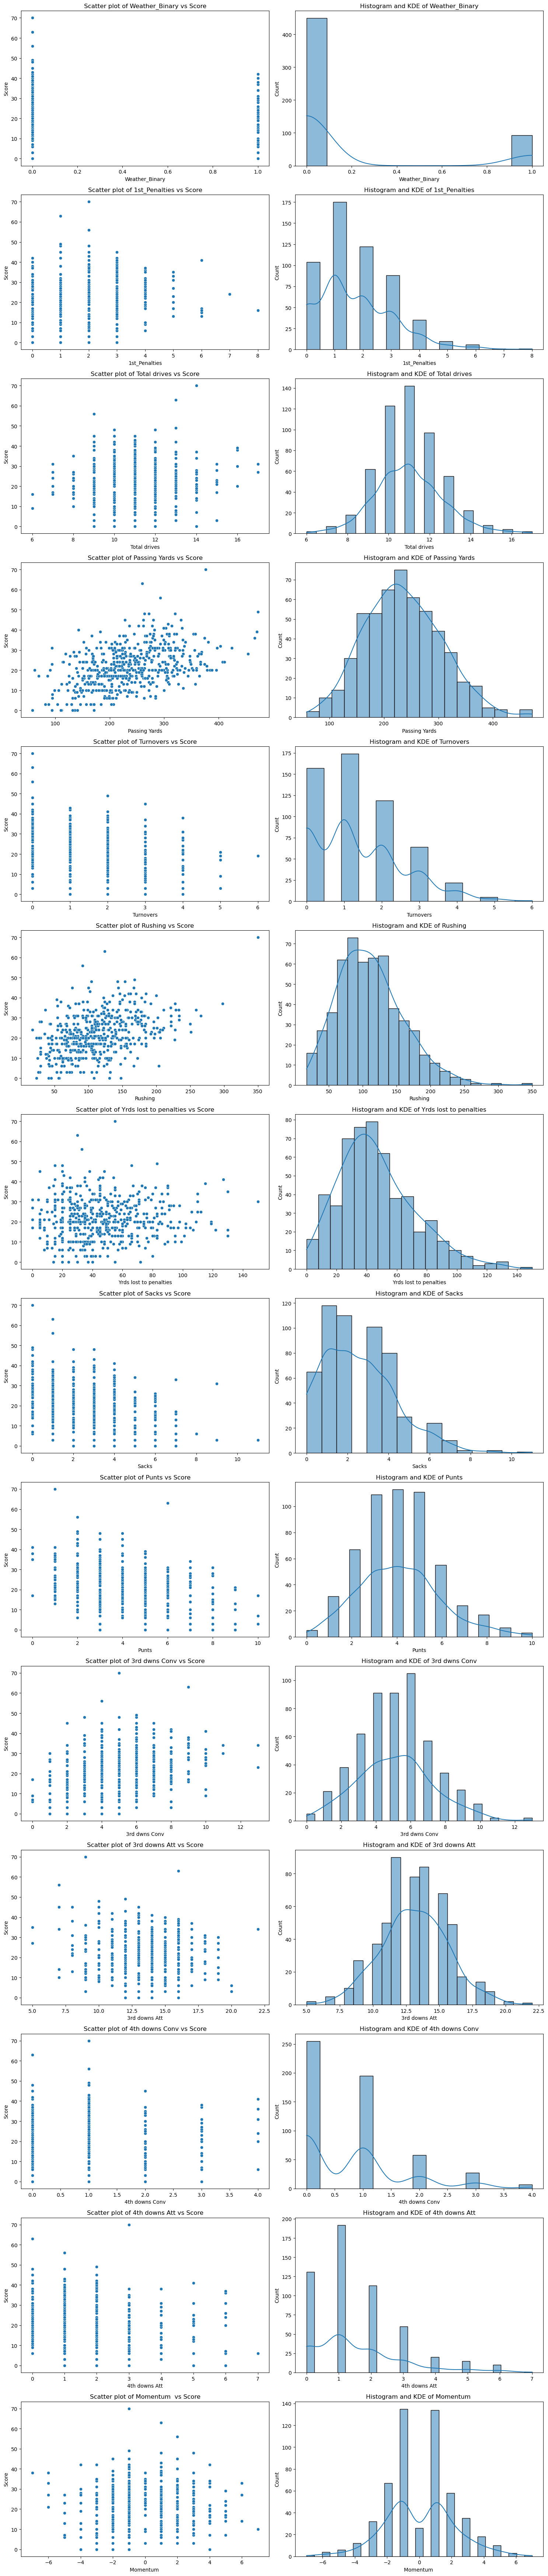

In [16]:
# List of variables to plot (excluding 'Score' and any columns to be excluded)
variables_to_plot = [
    'Weather_Binary', '1st_Penalties', 'Total drives', 'Passing Yards', 'Turnovers',
    'Rushing', 'Yrds lost to penalties', 'Sacks', 'Punts', '3rd dwns Conv', '3rd downs Att', 
    '4th downs Conv', '4th downs Att', 'Momentum '
]

y = data['Score']

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=2, figsize=(15, len(variables_to_plot) * 5))

# Iterate through each variable and create scatter plots and histograms with KDE
for i, var in enumerate(variables_to_plot):
    # Scatter plot
    sns.scatterplot(x=data[var], y=y, ax=axes[i, 0])
    axes[i, 0].set_title(f'Scatter plot of {var} vs Score')
    
    # Histogram with KDE
    sns.histplot(data[var], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram and KDE of {var}')

# Adjust layout
plt.tight_layout()
plt.show()


We can see that most of the scatterplots follow a positive or linear trend. Most of the distributions are approximately normal, with evidence of right skewness. This is to be expected when modeling sports scores, as most games will cluster around the mean, but exceptional performances in these metrics drive the skewness.  

It is interesting to see that 'Weather_Binary' appears to have a weak negative trend, suggesting that bad weather leads to lower scores. None of the high scores occur during bad weather. However, I already know that it will not be selected in my final model.


### 3.6 Creation of the Initial Model

Selected variables to train models

In [17]:
df = pd.read_csv('NFL{Defence}.csv')


y = df['Score']

# Define the independent variables explicitly based on the correlation matrix
X = df[['Weather_Binary', '1st_Penalties', 'Total drives', 'Passing Yards', 'Turnovers',
        'Rushing', 'Yrds lost to penalties', 'Sacks', 'Punts', '3rd dwns Conv', '3rd downs Att', 
        '4th downs Conv', '4th downs Att', 'Momentum ']]

def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features = forward_selection(X, y)
print("Selected features:", selected_features)


model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(model.summary())

# Save the final model to a file using pickle
with open('NFL_Final_Model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as NFL_Final_Model.pkl")


Selected features: ['Passing Yards', 'Rushing', 'Turnovers', 'Sacks', 'Total drives', 'Punts', '3rd downs Att', '3rd dwns Conv', '4th downs Conv', '4th downs Att']
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     127.7
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          2.75e-134
Time:                        14:42:33   Log-Likelihood:                -1690.3
No. Observations:                 542   AIC:                             3403.
Df Residuals:                     531   BIC:                             3450.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          

## 4 Model Validation and Diagnostics

### 4.1 Test for Linearity

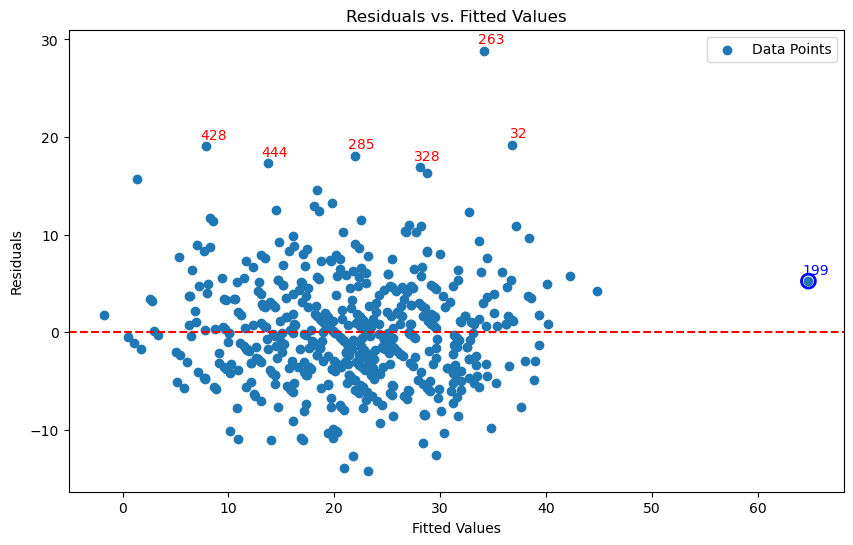

In [18]:
y = df['Score']

# Load the final model from the file using pickle
with open('NFL_Final_Model.pkl', 'rb') as file:
    model = pickle.load(file)

# Get fitted values and residuals from the model
fitted_values = model.fittedvalues
residuals = model.resid

# Calculate threshold for outliers (e.g., 3 standard deviations from the mean)
threshold = 3 * np.std(residuals)

# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, label='Data Points')

# Label outliers
outliers = np.abs(residuals) > threshold
for i in range(len(residuals)):
    if outliers[i]:
        plt.annotate(i, (fitted_values[i], residuals[i]), textcoords="offset points", xytext=(5,5), ha='center', color='red')

# Highlight and circle observation 199
obs_199_index = 199
plt.annotate(obs_199_index, (fitted_values[obs_199_index], residuals[obs_199_index]), 
             textcoords="offset points", xytext=(5,5), ha='center', color='blue')
plt.scatter(fitted_values[obs_199_index], residuals[obs_199_index], edgecolor='blue', facecolor='none', s=100, linewidth=2)

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.legend()
plt.show()


#### Analysis of the Residuals vs. Fitted Values Plot
- Centered Residuals: The residuals are centered around zero, which is a good sign. It indicates that the model does not have significant bias.

- Spread of Residuals: The residuals are spread evenly across the range of fitted values. This suggests homoscedasticity, meaning the variance of residuals is consistent across the fitted values.

- Outliers: There are a few outliers present, with residuals significantly far from zero. These points may indicate data points where the model performs poorly.

- Linearity: There is no clear pattern in the residuals, which suggests that the linear model is appropriate for the data.


#### Analysis of Residuals
- Context of the Model:

Modeling NFL game scores involves considerable unpredictability due to the numerous variables influencing game outcomes. Factors such as player performance, weather conditions, injuries, and in-game decisions can significantly impact final scores.

- Centered Residuals:

The residuals in the plot are centered around zero, indicating that, on average, the model does not consistently overestimate or underestimate the scores. This is a positive indication of the model's performance.

- Spread of Residuals:

The residuals are spread relatively evenly across the range of fitted values, suggesting that the variance of the errors (residuals) is consistent across different predicted scores. This indicates homoscedasticity, a desirable property in regression models, as it means the model's prediction error is roughly the same across all levels of the independent variables.

- Presence of Outliers:

Given the unpredictable nature of NFL games, the presence of outliers is expected. These outliers represent games where the actual scores significantly deviated from the predicted scores, potentially due to unexpected events or exceptional performances, which are common in sports.

- Model Limitations:

It is important to acknowledge the limitations of any model in predicting sports scores. While statistical models can provide useful predictions and insights, they cannot account for all the randomness and variability inherent in sports.

- Conclusion:

Overall, the model appears to be functioning well, but the presence of outliers is a natural consequence of the unpredictable nature of NFL games. While the model provides a general sense of expected scores, it is important to recognize that exact predictions will always have some level of uncertainty.


In [19]:
# Get fitted values and residuals from the model
fitted_values = model.fittedvalues
residuals = model.resid

# Identify the outlier at index 199
obs_199_index = 199
obs_199_fitted_value = fitted_values[obs_199_index]
obs_199_residual = residuals[obs_199_index]
obs_199_actual_score = y.iloc[obs_199_index]
obs_199_data_point = df.iloc[obs_199_index]

# Display information about the outlier
print("Outlier Index:", obs_199_index)
print("Fitted Value (Predicted Score):", obs_199_fitted_value)
print("Residual (Actual - Predicted):", obs_199_residual)
print("Actual Score:", obs_199_actual_score)
print("Data Point:\n", obs_199_data_point)

Outlier Index: 199
Fitted Value (Predicted Score): 64.77791231011693
Residual (Actual - Predicted): 5.222087689883068
Actual Score: 70
Data Point:
 Score                            70.0
Divisional                        0.0
Temp                             86.0
Wind_Binary                       0.0
Weather_Ord                       0.0
Total_Weather_Binary              0.0
Weather_Binary                    0.0
Wthr                              0.0
Weather_O                         0.0
Passing 1st                      16.0
Rushing 1st                      12.0
1st_Penalties                     2.0
Total drives                     14.0
YPP                              13.4
Passing Yards                   376.0
Interceptions                     0.0
Fumbles                           0.0
Turnovers                         0.0
Rushing                         350.0
Rushing Att                      43.0
YPR                               8.1
RZ ATT                            6.0
RZ Conv         


The outlier at the far right of the plot indicates a game where the model predicted a very high score, and the actual score was also high with a small deviation. This suggests that the model performed well in this case. 

#### 4.2 Outliers

Although observation 199 is not an outlier. I will speak about it in this section to explain issues with the outliers. As before mentioned given the unpredictable nature of NFL games, the presence of outliers is expected. It is nearly impossible to predict exact scores due to the unpredictability of human performance. The important thing to consider is that this model is competing against Vegas. The goal of this project is to create a model that better predicts the lines of games better than vegas. 

-Observation 199 is a great example of how the model is perfroming well. Of all games in the model, 70 was the highest recorded score. For the model to predict a score of nearly 65 is impressive considering the second highest recorded score in the model was 63. Vegas also had predicted a score of 26.5 for this team indicating our model is performing well. This game happened in week 3, so Vegas only had information from the previous two weeks of games whereas I have the data from the whole season which is important to consider. 

The second highest recorded score brings me to outlier 263 which is our largest outlier in the model. I have included observation 247 in this analysis also as this was the team observation 263 played against in the game. This was expected to be a low scoreing game with Vegas predicting a total score of 36.5 for the game, my model predicted a total score of 57 for the game. The total score in the game was 84. As mentioned before we are to expect outliers when modeling sports. These outliers represent exceptional or poor performances from certain players and teams that were unexpected to happen. For example the favorite doesnt always win in sporting events but most model would predict the favorite in most circumstances. This same analysis can be applied to all my outliers in the model, all the outliers are underpredicted score rather than overpredicted. The table is provided to show the the fitted, actual values, and vegas predictions.

#### 4.2 Outliers

- Although observation 199 is not an outlier, I will discuss it in this section to explain issues related to outliers. As previously mentioned, given the unpredictable nature of NFL games, the presence of outliers is expected. It is nearly impossible to predict exact scores due to the variability of human performance. The key consideration is that this model is competing against Vegas. The goal of this project is to create a model that predicts game lines more accurately than Vegas.

- Observation 199 is a great example of how the model is performing well. Of all games in the model, 70 was the highest recorded score. For the model to predict a score of nearly 65 is impressive, considering the second-highest recorded score in the model was 63. Vegas had predicted a score of 26.5 for this team, indicating that our model is performing well. This game occurred in Week 3, meaning Vegas only had information from the first two weeks of games, whereas I have data from the entire season, which is an important factor to consider.

- The second-highest recorded score brings me to outlier 263, which is the largest outlier in the model. I have also included observation 247 in this analysis, as this was the team that observation 263 played against in that game. This was expected to be a low-scoring game, with Vegas predicting a total score of 36.5, while my model predicted a total score of 57. However, the actual total score in the game was 84. As mentioned earlier, outliers are expected when modeling sports. These outliers represent exceptional or poor performances from certain players and teams that were unexpected. For example, the favorite does not always win in sporting events, but most models would predict the favorite in most circumstances. 

This same analysis applies to all outliers in the model—all outliers represent underpredicted scores rather than overpredicted ones. The table is provided to show the fitted values, actual values, and Vegas predictions.


In [20]:
fitted_values = model.fittedvalues
residuals = model.resid

# Identify the outlier at index 263
obs_263_index = 263
obs_263_fitted_value = fitted_values[obs_263_index]
obs_263_residual = residuals[obs_263_index]
obs_263_actual_score = y.iloc[obs_263_index]
obs_263_data_point = df.iloc[obs_263_index]


print("Outlier Index:", obs_263_index)
print("Fitted Value (Predicted Score):", obs_263_fitted_value)
print("Residual (Actual - Predicted):", obs_263_residual)
print("Actual Score:", obs_263_actual_score)
print("Data Point:\n", obs_263_data_point)

Outlier Index: 263
Fitted Value (Predicted Score): 34.15955263045639
Residual (Actual - Predicted): 28.84044736954361
Actual Score: 63
Data Point:
 Score                            63.0
Divisional                        1.0
Temp                             60.0
Wind_Binary                       0.0
Weather_Ord                       0.0
Total_Weather_Binary              0.0
Weather_Binary                    0.0
Wthr                              0.0
Weather_O                         0.0
Passing 1st                      13.0
Rushing 1st                       6.0
1st_Penalties                     1.0
Total drives                     13.0
YPP                               7.2
Passing Yards                   260.0
Interceptions                     0.0
Fumbles                           0.0
Turnovers                         0.0
Rushing                         124.0
Rushing Att                      26.0
YPR                               4.8
RZ ATT                            3.0
RZ Conv         

In [21]:
fitted_values = model.fittedvalues
residuals = model.resid

# Identify the outlier at index 247
obs_247_index = 247
obs_247_fitted_value = fitted_values[obs_247_index]
obs_247_residual = residuals[obs_247_index]
obs_247_actual_score = y.iloc[obs_247_index]
obs_247_data_point = df.iloc[obs_247_index]

print("Outlier Index:", obs_247_index)
print("Fitted Value (Predicted Score):", obs_247_fitted_value)
print("Residual (Actual - Predicted):", obs_247_residual)
print("Actual Score:", obs_247_actual_score)
print("Data Point:\n", obs_247_data_point)

Outlier Index: 247
Fitted Value (Predicted Score): 22.83835655268267
Residual (Actual - Predicted): -1.8383565526826686
Actual Score: 21
Data Point:
 Score                            21.0
Divisional                        1.0
Temp                             60.0
Wind_Binary                       0.0
Weather_Ord                       0.0
Total_Weather_Binary              0.0
Weather_Binary                    0.0
Wthr                              0.0
Weather_O                         0.0
Passing 1st                      13.0
Rushing 1st                       4.0
1st_Penalties                     1.0
Total drives                     15.0
YPP                               8.0
Passing Yards                   257.0
Interceptions                     1.0
Fumbles                           4.0
Turnovers                         5.0
Rushing                          92.0
Rushing Att                      28.0
YPR                               3.3
RZ ATT                            2.0
RZ Conv       

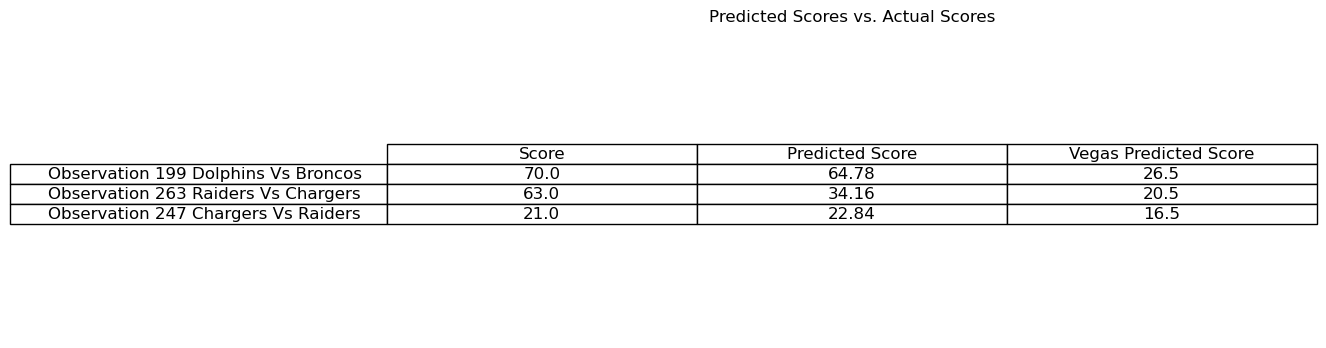

In [22]:
# Define the data
data = {
    "Score": [70, 63, 21],
    "Predicted Score": [64.78, 34.16, 22.84],
    "Vegas Predicted Score": [26.5, 20.5, 16.5]
}

# Define the row labels
index = [
    "Observation 199 Dolphins Vs Broncos",
    "Observation 263 Raiders Vs Chargers",
    "Observation 247 Chargers Vs Raiders"
]

# Create the DataFrame
df = pd.DataFrame(data, index=index)

# Display the DataFrame as a table using Matplotlib
fig, ax = plt.subplots(figsize=(10, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # scale size of table

plt.title('Predicted Scores vs. Actual Scores')
plt.show()


This table perfectly shows the initailly trained models ability to beat Vegas. We must not forget that our model has access to all the data. Later we will be computing estimates using averages which dont get nearly as close as these estimates.

### 4.3 Test for Normality
#### Analysis of Residuals: Context of Modeling Sports Scores

/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/johnreed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


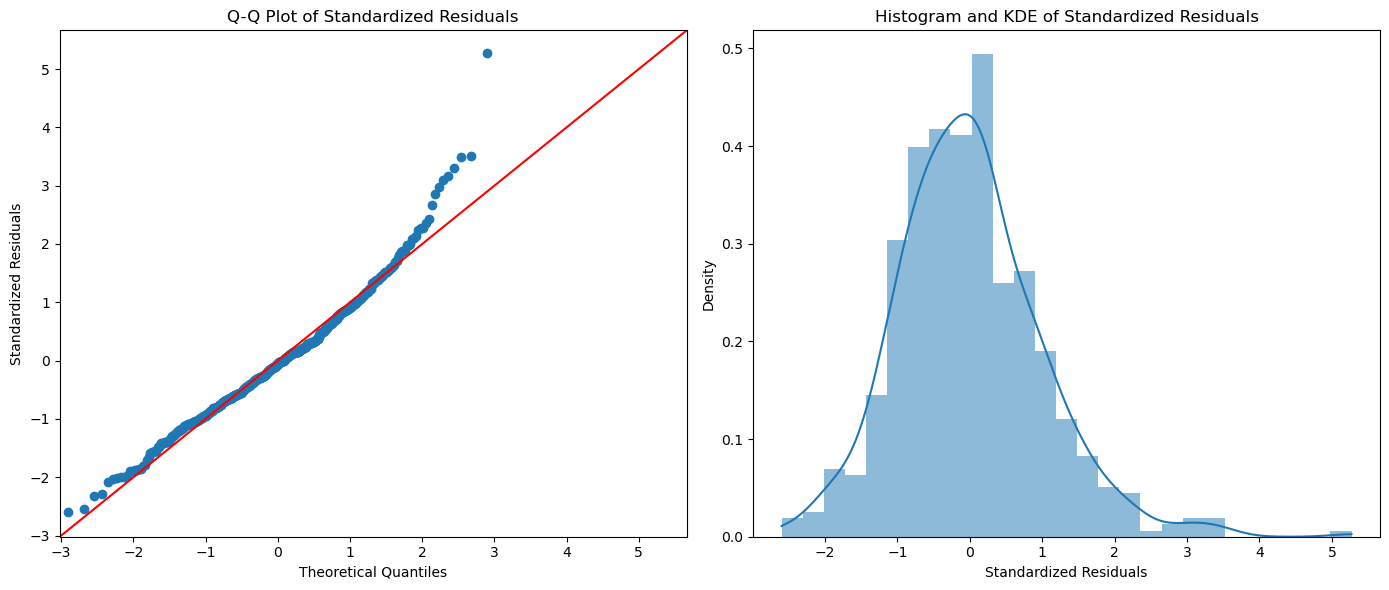

In [23]:
y = df['Score']

with open('NFL_Final_Model.pkl', 'rb') as file:
    model = pickle.load(file)

# Get residuals from the model
residuals = model.resid

# Calculate standardized residuals
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Q-Q Plot
sm.qqplot(standardized_residuals, line='45', ax=axes[0])
axes[0].set_title('Q-Q Plot of Standardized Residuals')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Standardized Residuals')

# Histogram with Kernel Density Estimate
sns.histplot(standardized_residuals, kde=True, stat="density", linewidth=0, ax=axes[1])
axes[1].set_title('Histogram and KDE of Standardized Residuals')
axes[1].set_xlabel('Standardized Residuals')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


#### Q-Q Plot:

- Center portion: The majority of the residuals lie along the reference line, indicating that for many games, the residuals approximate a normal distribution. This suggests that the model performs well for the bulk of predictions.

- Tails: Deviations at both ends (the tails) of the distribution are apparent. Points in the upper tail (right side) are above the line, and points in the lower tail (left side) are below the line, indicating heavier tails than a normal distribution. This is typical in sports modeling due to extreme performances or unexpected game outcomes.

- Outliers: Some points at the extreme ends are significantly far from the reference line, indicating the presence of outliers. In sports modeling, these outliers can correspond to exceptionally high- or low-scoring games, which are natural occurrences in sports data.

#### Histogram:

- Center peak: The histogram has a peak around the center, indicating that most residuals are concentrated near the mean (standardized to 0). This suggests that for many games, the model's predictions are fairly accurate.

- Skewness: There is slight right skewness, visible as a longer tail on the right side of the histogram. This can occur due to occasional high-scoring games. This corresponds with our residuals vs fitted values plot, as we noted earlier that all outliers above two standard deviations correspond to games where the score was much higher than predicted.

- Tails: The heavy tails observed in the distribution indicate more frequent extreme values than would be expected under a normal distribution. This aligns with expectations in sports modeling, where games can occasionally deviate significantly from the norm.

#### Conclusion:

Questioning normality in sports scores:

- Expected deviations: While the central portion of the residuals approximates normality, deviations in the tails and slight skewness are expected in the context of modeling sports scores. These deviations are not necessarily problematic but reflect the natural variability in sports outcomes.

- Model performance: The model performs well for most games, as indicated by the central residuals closely following the normal distribution. The presence of outliers and skewness is expected and understandable given the nature of sports scores.



#### 4.4 Constancy of Error Variance

In regression analysis, checking the assumption of homoscedasticity (constant variance of errors) is crucial for validating the model. The Breusch-Pagan test is a common statistical test used to detect heteroscedasticity. Here, we perform the Breusch-Pagan test on a regression model predicting NFL game scores and analyze the results, including a Scale-Location plot.

#### Breusch-Pagan Test

Null Hypothesis (H0): The error variance is constant (homoscedasticity).  

Alternative Hypothesis (H1): The error variance is not constant (heteroscedasticity).  

Breusch-Pagan Test Statistic:  

Also known as the Lagrange Multiplier (LM) statistic, the LM statistic in the Breusch-Pagan test is calculated as:  

LM = n × R²  

#### Interpretation

- Lagrange Multiplier Statistic (BP): 7.3996  
  This statistic is used to determine whether there is evidence of heteroscedasticity. A high value would indicate potential heteroscedasticity.  

- p-value: 0.6873  
  The p-value associated with the Lagrange Multiplier Statistic is 0.6873. This is much higher than the typical significance level (0.05), indicating insufficient evidence to reject the null hypothesis of homoscedasticity.  

- f-value: 0.7350  
  The f-statistic for the auxiliary regression is 0.7350.  

- f p-value: 0.6916  
  The p-value associated with the f-statistic is 0.6916, reinforcing the conclusion that there is no significant evidence of heteroscedasticity.  

Given the high p-values from both the Lagrange Multiplier Statistic and the f-statistic, we fail to reject the null hypothesis of homoscedasticity. This indicates that there is no significant evidence of heteroscedasticity in the regression model.

#### Scale-Location Plot

The Scale-Location plot (also known as the Spread-Location plot) is used to check the homoscedasticity assumption visually. It plots the square root of the absolute standardized residuals against the fitted values.

- Red Line: LOWESS smoother to highlight the trend.  
  LOWESS (Locally Weighted Scatterplot Smoothing) is a non-parametric regression method used to create a smooth line through a scatterplot. This technique is particularly useful for visualizing trends in the data without assuming a specific functional form of the relationship between variables.  

- Visual Check:  
  If the points are randomly scattered and the red line is relatively flat, it suggests that the variance of residuals is constant.  
  In the provided plot, the points appear to be randomly scattered around the horizontal line, and the red LOWESS line is relatively flat. This visually supports the conclusion from the Breusch-Pagan test that the residuals have constant variance.  

#### Conclusion

Both the Breusch-Pagan test results and the Scale-Location plot suggest that the assumption of homoscedasticity is met for the regression model predicting NFL game scores. Despite the presence of outliers and variability inherent in sports scores, the tests indicate that the variance of residuals does not systematically change with fitted values, implying homoscedasticity.


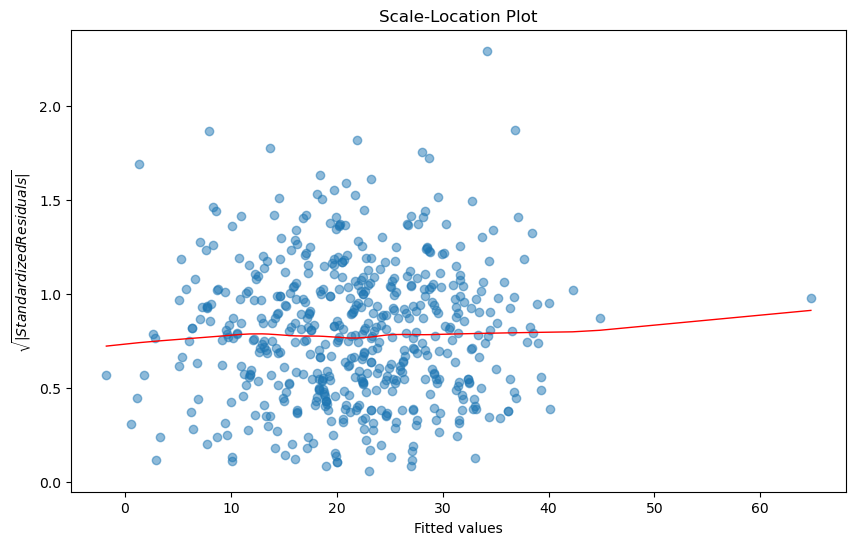

Lagrange multiplier statistic: 7.399604535614183
p-value: 0.6872575404534261
f-value: 0.7349770111931931
f p-value: 0.6916373991168191


In [24]:
df = pd.read_csv('NFL{Defence}.csv')

y = df['Score']

with open('NFL_Final_Model.pkl', 'rb') as file:
    model = pickle.load(file)

# Get fitted values and residuals from the model
fitted_values = model.fittedvalues
residuals = model.resid

# Calculate standardized residuals
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Calculate sqrt of the standardized residuals
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# Create the Scale-Location plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, sqrt_standardized_residuals, alpha=0.5)
sns.regplot(x=fitted_values, y=sqrt_standardized_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('$\sqrt{|Standardized Residuals|}$')
plt.title('Scale-Location Plot')
plt.show()

# Perform Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residuals, model.model.exog)
results = lzip(names, test)

# Print the Breusch-Pagan test results
for name, result in results:
    print(f"{name}: {result}")


### 4.5 Test for Independence
#### Durbin Watson Test for autocorrelation

In [25]:
residuals = model.resid


dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 1.8829022212685755


#### Importance of Independence in OLS Models

#### Assumption of Independence

One of the fundamental assumptions of OLS regression is that the residuals are independent. This means that the error term for one observation should not be correlated with the error term for another observation. Independence of residuals is crucial for ensuring the validity of the OLS estimates.

#### Efficiency of Coefficient Estimates

- Unbiased estimates: Independence of residuals helps ensure that the estimated coefficients are unbiased. This means the expected value of the estimated coefficients equals the true population parameters.  
- Minimum variance: When residuals are independent, the OLS estimates are the best linear unbiased estimators. This means they have the smallest possible variance among all unbiased linear estimators, leading to more precise and reliable estimates.  

#### Correct Standard Errors

- Independence of residuals ensures that the standard errors of the coefficient estimates are correctly estimated. This is crucial for constructing confidence intervals and conducting hypothesis tests.  
- If residuals are autocorrelated, the standard errors may be underestimated, leading to incorrect t-statistics and p-values. This can result in misleading conclusions about the significance of predictors.  

#### Valid Hypothesis Tests

- When residuals are independent, the t-tests and F-tests used to evaluate the significance of the coefficients are valid. This means the p-values from these tests are accurate, leading to correct conclusions about the relationships between variables.  

#### Predictive Accuracy

Independent residuals contribute to better predictive accuracy of the regression model. If residuals are autocorrelated, the model may systematically over- or under-predict certain values, reducing the model's overall accuracy.

The Durbin-Watson (DW) test is used to detect the presence of autocorrelation in the residuals from a regression analysis. Autocorrelation occurs when the residuals are not independent of each other, which violates one of the key assumptions of ordinary least squares (OLS) regression.

#### Interpretation of the Durbin-Watson Statistic

The DW statistic ranges from 0 to 4:

- DW ≈ 2: Indicates no autocorrelation.  
- DW < 2: Indicates positive autocorrelation (successive residuals are positively correlated).  
- DW > 2: Indicates negative autocorrelation (successive residuals are negatively correlated).  

#### Result Analysis

Given the Durbin-Watson statistic of 1.8829:

- Close to 2: A DW value of 1.8829 is very close to 2, indicating that there is little to no autocorrelation in the residuals.  
- Positive autocorrelation: Since the value is slightly less than 2, it suggests a very mild positive autocorrelation, but this is not strong enough to be of concern.  

#### Importance of the Result

- The result supports the assumption that the residuals from the regression model are independent.  


### 4.6 Multicollinearity 

In [26]:
# Load the final model and data
with open('NFL_Final_Model.pkl', 'rb') as file:
    model = pickle.load(file)

# Extract the selected features from the model
selected_features = model.model.exog_names
if 'const' in selected_features:
    selected_features.remove('const')

df = pd.read_csv('NFL{Defence}.csv')

# Calculate VIF for the selected features
X_selected = df[selected_features]
X_vif = sm.add_constant(X_selected)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

           Feature        VIF
0            const  75.750652
1    Passing Yards   1.661890
2          Rushing   1.442331
3        Turnovers   1.372513
4            Sacks   1.298588
5     Total drives   2.495676
6            Punts   3.425798
7    3rd downs Att   4.483943
8    3rd dwns Conv   4.658474
9   4th downs Conv   2.353152
10   4th downs Att   2.754313


#### Constant

#### VIF: 75.750652

Interpretation: The VIF for the constant is very high, but this is expected and not a concern in this context. The constant term in the regression model captures the baseline level of the dependent variable when all predictors are zero. In this case, it has already been classified as insignificant by the regression model, indicating that it cannot be distinguished from zero. This is acceptable because, in sports modeling, the baseline score is naturally zero for all teams.

The analysis of the VIF results indicates that most predictors have low to moderate multicollinearity, which is acceptable for the model. The constant term has a high VIF, but its insignificance in the regression model and the nature of sports modeling make this acceptable. Predictors like third down attempts and conversions show moderate to high multicollinearity, suggesting some overlap in the information they provide. However, they remain essential variables in capturing the nuances of team performance and game outcomes. I considered aggregating them, but the model really needs to capture this data. What is more important, efficiency or attempts?


## 5 Model creation

### 5.1 Model One
#### Base model

After identifying the significant predictors, the data is split into training and test sets. The training data includes games up until the end of week 13 for all teams. The test data consists of the remaining games in the season.

Training Process:

Initial Training: The model is initially trained on data from weeks 1 to 13.

Weekly Updates: Each week, all 32 teams play a game, which is treated as a new observation.

Model Update: After making predictions for the 32 games in a week, these observations are added to the training data.

Retraining: A new model is created incorporating the latest data.

Continuous Prediction: This process is repeated weekly, with the model being updated and retrained after each week.
For this model, all teams are trained and tested on the same model, which is updated continuously. The averages for the opposing  teams up to the modeled week are used to make predictions.

In [27]:
# Load the train and test datasets
NFL_Train = pd.read_csv('NFL_Train.csv')
NFL_Test = pd.read_csv('NFL_Test.csv')

# Drop any unnamed columns that might have been read in
NFL_Train = NFL_Train.loc[:, ~NFL_Train.columns.str.contains('^Unnamed')]
NFL_Test = NFL_Test.loc[:, ~NFL_Test.columns.str.contains('^Unnamed')]

# Standardize team names to lowercase and remove extra whitespace
NFL_Train['Offence'] = NFL_Train['Offence'].str.strip().str.lower()
NFL_Train['Defence'] = NFL_Train['Defence'].str.strip().str.lower()
NFL_Test['Offence'] = NFL_Test['Offence'].str.strip().str.lower()
NFL_Test['Defence'] = NFL_Test['Defence'].str.strip().str.lower()

# Ensure all columns used in the regression are numeric except categorical ones
non_numeric_columns = ['Offence', 'Defence', 'Line', 'Vegas_Expected_Score', 'Total_Points_Vegas', 'Week']
numeric_columns = NFL_Train.columns.difference(non_numeric_columns)
NFL_Train[numeric_columns] = NFL_Train[numeric_columns].apply(pd.to_numeric, errors='coerce')
NFL_Test[numeric_columns] = NFL_Test[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with 0
NFL_Train = NFL_Train.fillna(0)
NFL_Test = NFL_Test.fillna(0)

# Define regression features (excluding 'Score' which is the target)
features = numeric_columns.difference(['Score'])

# Function to train the model
def train_model(train_data):
    X_train = train_data[features]
    y_train = train_data['Score']
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()
    return model

# Train the initial model
initial_model = train_model(NFL_Train)

# Print model parameters for verification
print("Initial Model parameters:")
print(initial_model.params)

# Initialize DataFrames for predictions and averages
columns = ['Offence', 'Defence', 'Week', 'Predicted_Score', 'Actual_Score', 'Difference',
           'Line', 'Vegas_Expected_Score', 'Total_Points_Vegas', 'Opponent_Predicted_Score',
           'Opponent_Actual_Score', 'Total_Predicted_Score', 'Total_Actual_Score']
predictions_df = pd.DataFrame(columns=columns)

averages_columns = ['Team', 'Week'] + list(features)
averages_df = pd.DataFrame(columns=averages_columns)

# Define week order
weeks = NFL_Test['Week'].unique()
numeric_weeks = sorted([week for week in weeks if week.isdigit()])
special_weeks = [week for week in weeks if not week.isdigit()]

# Function to calculate team averages
def calculate_team_averages(train_data, team, week, numeric=True):
    if numeric:
        team_data_up_to_week = train_data[(train_data['Offence'] == team) & (train_data['Week'].astype(int) < int(week))]
    else:
        team_data_up_to_week = train_data[(train_data['Offence'] == team)]
    
    team_averages = team_data_up_to_week[features].mean().to_frame().T
    team_averages['Team'] = team
    team_averages['Week'] = week
    team_averages = team_averages.fillna(0)
    return team_averages

# Iterate over weeks
for week in numeric_weeks + special_weeks:
    print(f"Processing week: {week}")
    
    current_week_test = NFL_Test[NFL_Test['Week'] == week].copy()
    weekly_predictions = []

    for team in current_week_test['Offence'].unique():
        if week.isdigit():
            team_averages = calculate_team_averages(NFL_Train, team, week, numeric=True)
        else:
            team_averages = calculate_team_averages(NFL_Train, team, week, numeric=False)

        # Save the averages
        averages_df = pd.concat([averages_df, team_averages], ignore_index=True)

        # Prepare data for prediction
        team_averages_for_prediction = team_averages.drop(columns=['Team', 'Week'])
        team_averages_for_prediction = sm.add_constant(team_averages_for_prediction, has_constant='add')

        # Predict offensive score
        predicted_score = initial_model.predict(team_averages_for_prediction).iloc[0]

        weekly_predictions.append({'Offence': team, 'Week': week, 'Predicted_Score': predicted_score})

    weekly_predictions_df = pd.DataFrame(weekly_predictions)

    # Merge predictions
    current_week_test = current_week_test.merge(weekly_predictions_df, on=['Offence', 'Week'], how='left')

    # Assign Actual Score
    current_week_test['Actual_Score'] = current_week_test['Score']

    # Calculate opponent's predicted and actual score
    for index, row in current_week_test.iterrows():
        opponent = row['Defence']
        
        # Find opponent's **Predicted Score**
        opponent_pred_score = weekly_predictions_df.loc[weekly_predictions_df['Offence'] == opponent, 'Predicted_Score']
        opponent_pred_score = opponent_pred_score.iloc[0] if not opponent_pred_score.empty else None
        
        # Find opponent's **Actual Score**
        opponent_actual_score = current_week_test.loc[current_week_test['Offence'] == opponent, 'Actual_Score']
        opponent_actual_score = opponent_actual_score.iloc[0] if not opponent_actual_score.empty else None

        current_week_test.at[index, 'Opponent_Predicted_Score'] = opponent_pred_score
        current_week_test.at[index, 'Opponent_Actual_Score'] = opponent_actual_score

    # ✅ Ensure 'Difference' exists before merging
    current_week_test['Difference'] = current_week_test['Predicted_Score'] - current_week_test['Actual_Score']
    
    # Calculate total predicted and actual scores
    current_week_test['Total_Predicted_Score'] = current_week_test['Predicted_Score'] + current_week_test['Opponent_Predicted_Score']
    current_week_test['Total_Actual_Score'] = current_week_test['Actual_Score'] + current_week_test['Opponent_Actual_Score']

    # Append to predictions_df
    predictions_df = pd.concat([predictions_df, current_week_test[columns]], ignore_index=True)
    
    # Update training data
    NFL_Train = pd.concat([NFL_Train, current_week_test], ignore_index=True)
    initial_model = train_model(NFL_Train)

    # Print updated model parameters
    print(f"Updated Model parameters after week {week}:")
    print(initial_model.params)

    # Calculate and print MSE for the current week
    week_mse = mean_squared_error(current_week_test['Actual_Score'], current_week_test['Predicted_Score'])
    print(f"MSE for week {week}: {week_mse}")

# Save predictions and averages
predictions_df.to_csv('weekly_predictions.csv', index=False)
averages_df.to_csv('team_averages_all_weeks.csv', index=False)

print("Averages for all weeks saved to 'team_averages_all_weeks.csv'.")
print(predictions_df)


Initial Model parameters:
const             1.051124
3rd downs Att    -2.048065
3rd dwns Conv     1.780201
4th downs Att    -1.659009
4th downs Conv    3.707506
Passing Yards     0.029213
Punts            -1.887383
Rushing           0.039660
Sacks            -0.333537
Total drives      3.674813
Turnovers        -3.863601
dtype: float64
Processing week: 14
Updated Model parameters after week 14:
const             0.928023
3rd downs Att    -1.968191
3rd dwns Conv     1.721631
4th downs Att    -1.790045
4th downs Conv    3.814873
Passing Yards     0.028347
Punts            -1.892100
Rushing           0.039350
Sacks            -0.404989
Total drives      3.666820
Turnovers        -3.802096
dtype: float64
MSE for week 14: 105.51955096326094
Processing week: 15


/var/folders/4b/h07ynhfd3fj1d481r92kkdtw0000gn/T/ipykernel_796/2753570974.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  averages_df = pd.concat([averages_df, team_averages], ignore_index=True)
/var/folders/4b/h07ynhfd3fj1d481r92kkdtw0000gn/T/ipykernel_796/2753570974.py:130: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, current_week_test[columns]], ignore_index=True)


Updated Model parameters after week 15:
const            -0.623545
3rd downs Att    -2.002857
3rd dwns Conv     1.834614
4th downs Att    -1.667788
4th downs Conv    3.669199
Passing Yards     0.029805
Punts            -1.696313
Rushing           0.040769
Sacks            -0.444799
Total drives      3.687965
Turnovers        -3.823938
dtype: float64
MSE for week 15: 154.0123821063426
Processing week: 16
Updated Model parameters after week 16:
const             0.010678
3rd downs Att    -1.991458
3rd dwns Conv     1.831241
4th downs Att    -1.673286
4th downs Conv    3.727533
Passing Yards     0.029348
Punts            -1.676022
Rushing           0.038287
Sacks            -0.516736
Total drives      3.643256
Turnovers        -3.622785
dtype: float64
MSE for week 16: 73.5155000724741
Processing week: 17
Updated Model parameters after week 17:
const             0.737939
3rd downs Att    -2.054783
3rd dwns Conv     1.877705
4th downs Att    -1.631147
4th downs Conv    3.759420
Passing Yard

In [28]:
# Load the predictions and actual scores from the CSV file
predictions_df = pd.read_csv('weekly_predictions.csv')

# Ensure unique games by averaging duplicates
unique_games = predictions_df.groupby(['Offence', 'Defence', 'Week'], as_index=False).mean()

# Adjust for duplicates by dividing the relevant columns by 2
unique_games['Total_Actual_Score'] /= 2
unique_games['Total_Predicted_Score'] /= 2
unique_games['Total_Points_Vegas'] /= 2

# Calculate the MSE for the model's predictions vs actual scores (without averaging duplicates)
total_mse_model_vs_actual = mean_squared_error(predictions_df['Actual_Score'], predictions_df['Predicted_Score'])
print(f"Total MSE for the model's predictions vs. actual scores: {total_mse_model_vs_actual}")

# Calculate the MSE for the model's predictions vs Vegas expected scores (without averaging duplicates)
total_mse_model_vs_vegas = mean_squared_error(predictions_df['Vegas_Expected_Score'], predictions_df['Predicted_Score'])
print(f"Total MSE for the model's predictions vs. Vegas expected scores: {total_mse_model_vs_vegas}")

# Calculate the MSE for the actual scores vs Vegas expected scores (without averaging duplicates)
total_mse_actual_vs_vegas = mean_squared_error(predictions_df['Actual_Score'], predictions_df['Vegas_Expected_Score'])
print(f"MSE for the actual scores vs. Vegas expected scores: {total_mse_actual_vs_vegas}")

# Calculate the MSE for Total_Predicted_Score vs Total_Actual_Score
total_mse_total_pred_vs_total_actual = mean_squared_error(unique_games['Total_Actual_Score'], unique_games['Total_Predicted_Score'])
print(f"Total MSE for Total_Predicted_Score vs. Total_Actual_Score: {total_mse_total_pred_vs_total_actual}")

# Calculate the MSE for Total_Actual_Score vs Total_Points_Vegas
total_mse_total_actual_vs_total_vegas = mean_squared_error(unique_games['Total_Actual_Score'], unique_games['Total_Points_Vegas'])
print(f"Total MSE for Total_Actual_Score vs. Total_Points_Vegas: {total_mse_total_actual_vs_total_vegas}")

# Calculate the MSE for Total_Predicted_Score vs Total_Points_Vegas
total_mse_total_pred_vs_total_vegas = mean_squared_error(unique_games['Total_Predicted_Score'], unique_games['Total_Points_Vegas'])
print(f"Total MSE for Total_Predicted_Score vs. Total_Points_Vegas: {total_mse_total_pred_vs_total_vegas}")

Total MSE for the model's predictions vs. actual scores: 106.21707355194606
Total MSE for the model's predictions vs. Vegas expected scores: 10.402686710455166
MSE for the actual scores vs. Vegas expected scores: 93.85463483146067
Total MSE for Total_Predicted_Score vs. Total_Actual_Score: 48.94700662966877
Total MSE for Total_Actual_Score vs. Total_Points_Vegas: 44.36587078651685
Total MSE for Total_Predicted_Score vs. Total_Points_Vegas: 4.787197389753666


### MSE Analysis for Model 1:

#### Model Predictions vs. Actual Scores
The MSE for our model’s predicted scores vs. actual scores is 106.22, indicating that while the model captures general trends, individual game outcomes remain difficult to predict accurately. This result highlights the inherent unpredictability of the NFL but also provides a baseline for improvement as we refine our approach.

#### Model Predictions vs. Vegas Expected Scores
The MSE for our model’s predicted scores vs. Vegas expected scores is 10.40, an extremely low value compared to the MSE for actual scores vs. Vegas (93.85). This suggests that our model’s predictions align very closely with Vegas’s expectations, which is an encouraging sign that we are on the right track. Given that Vegas lines incorporate vast amounts of data and market adjustments, achieving such a close match indicates that our model is already operating at a high level.

####  Actual Scores vs. Vegas Expected Scores
The MSE for actual scores vs. Vegas expected scores is 93.85, reinforcing the volatility of individual game outcomes. Despite Vegas’s expertise, there remains a significant level of unpredictability in actual results, further proving the difficulty of outperforming betting markets on a game-by-game basis.

(It is important to note that this metric should remain constant across all models, as it only measures the accuracy of Vegas’s predictions against actual scores. Any minor discrepancies in later models may be due to rounding differences, data processing variations, or floating-point precision).

#### Total Predicted Scores vs. Total Actual Scores
The MSE for total predicted scores vs. total actual scores is 48.95, showing that our model performs well in predicting total game scores, though some variance remains. Since aggregated totals tend to be more stable than individual scores, this relatively low MSE suggests that our model is capturing overall scoring trends effectively.

#### Total Actual Scores vs. Total Points Vegas
The MSE for total actual scores vs. total points Vegas is 44.37, slightly lower than our model’s MSE for total predicted scores vs. actual scores (48.95). This indicates that Vegas holds a small edge in predicting total combined scores, but the gap is narrow. Given that oddsmakers have access to vast betting market adjustments, our model’s proximity to these estimates further confirms that it is performing at a strong level.

(Similar to 'Actual Scores vs. Vegas Expevted Scores', this should stay constant across all models, as again, it only measures the accuracy of Vegas's predictions against actual scores).

#### Total Predicted Scores vs. Total Points Vegas
The MSE for total predicted scores vs. total points Vegas is 4.79, the lowest among all metrics. This shows that our model aligns extremely well with Vegas when predicting total game scores, reinforcing that aggregated predictions are generally more stable than individual game outcomes. The fact that our model produces results this close to Vegas's suggests that it is already well-calibrated for setting accurate expectations.

### 5.2 Model 2: 

#### Individual Models for Each Team

#### Overview
This model is expected to perform the worst in terms of predictive accuracy due to the small sample size for each team, which inherently leads to high variance and instability. However, the real value of this approach lies in its ability to analyze each team individually and assess whether team-specific modeling provides unique insights that a league-wide model cannot capture.

#### Rationale
- Unique Characteristics: Every NFL team has distinct strategies, play styles, and tendencies, making it beneficial to develop tailored models for each team.
- Specific Adjustments: Teams vary in their reliance on passing vs. rushing, coaching philosophies, and player impact, all of which should be captured individually for more precise predictions.

#### Methodology
This approach involves training an individual regression model for each team using data up to Week 13. Predictions are then made iteratively:

1. Train the model on data up to Week 13.
2. Use the averages from the opposing team to predict the Week 14 score.
3. Add the Week 14 result to the training set and use it to predict Week 15.
4. Continue this iterative process for the remainder of the season.

The goal of this approach is to capture each team's unique characteristics. When all teams are trained under the same model, the estimates tend to regress toward the mean due to the nature of the data. Strong team performances are averaged out by weaker teams, resulting in a loss of valuable differentiation.

In an ideal scenario, this model would outperform the baseline because it incorporates team-specific information, such as:

- Coaching tendencies
- Play-calling preferences (pass-heavy vs. run-heavy)
- The impact of individual players on team performance

#### Limitations
The main challenge with this approach is the limited number of observations per team:

- Each team plays a minimum of 17 games in a season and a maximum of 22 games (including playoffs).
- At most, this provides 21 observations for training, which is extremely limited for regression modeling.

Training a regression model on such a small dataset introduces several issues:

- Overfitting: The model may learn patterns that do not generalize well.
- High variance: Small changes in the data can lead to drastic shifts in predictions.
- Unstable coefficients: With limited data, regression estimates may be wildly inaccurate.
- Feature selection constraints: Only a minimal set of features can be used to avoid further instability.

For this model, I will train each team using the 10 most significant variables identified earlier. If we had more observations, we could perform feature selection across all teams to determine whether the same features would consistently be selected. However, due to the limited data available, we will use these 10 variables for all models in this project.


In [29]:
# Directory containing team CSV files
directory = '/users/johnreed/Downloads/Machine learning/NFL_Teams/Team_CSVs'

# Initialize empty DataFrame to store all games
all_games = []

# Read and preprocess all files
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        team_name = filename.split('.')[0].lower()
        file_path = os.path.join(directory, filename)
        
        # Read the team's file
        team_data = pd.read_csv(file_path)
        team_data['Week'] = team_data['Week'].astype(str)
        team_data['Defence'] = team_name  # The team whose file we are processing
        team_data['Offence'] = team_data['Offence'].str.lower()  # The opponent team
        
        # Append this processed data
        all_games.append(team_data)

# Combine all team data
all_games_df = pd.concat(all_games, ignore_index=True)

# Validate logic by ensuring "Offence" and "Defence" are not the same
invalid_rows = all_games_df[all_games_df['Offence'] == all_games_df['Defence']]
if not invalid_rows.empty:
    print("Validation failed: Found rows with identical 'Offence' and 'Defence':")
    print(invalid_rows)
else:
    print("Validation passed: No rows with identical 'Offence' and 'Defence'.")

# Save consolidated file for further processing
all_games_df.to_csv('all_games_corrected.csv', index=False)
print("Consolidated file saved as 'all_games_corrected.csv'.")


Validation passed: No rows with identical 'Offence' and 'Defence'.
Consolidated file saved as 'all_games_corrected.csv'.


In [51]:
# Load the consolidated game data and team averages
all_games_df = pd.read_csv('all_games_corrected.csv')
team_averages = pd.read_csv('team_averages_all_weeks.csv')

# Ensure consistent formatting
team_averages['Week'] = team_averages['Week'].astype(str)
team_averages['Offence'] = team_averages['Team'].str.lower()
all_games_df['Week'] = all_games_df['Week'].astype(str)
all_games_df['Offence'] = all_games_df['Offence'].str.lower()
all_games_df['Defence'] = all_games_df['Defence'].str.lower()

# Define the features for regression (from averages)
features = [
    '3rd downs Att', '3rd dwns Conv', '4th downs Att', '4th downs Conv',
    'Passing Yards', 'Punts', 'Rushing', 'Sacks', 'Total drives', 'Turnovers'
]

# Initialize an empty DataFrame to store predictions
columns = [
    'Offence', 'Defence', 'Week', 'Predicted_Score', 'Actual_Score', 'Difference',
    'Line', 'Vegas_Expected_Score', 'Total_Points_Vegas', 'Opponent_Actual_Score',
    'Total_Actual_Score', 'Total_Predicted_Score'
]
predictions_df = pd.DataFrame(columns=columns)

# Function to train the model
def train_model(data):
    X = data[features]
    y = data['Score']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

# Dictionary to store predictions temporarily for easy lookup
predicted_scores = {}

# Define playoff weeks
playoff_weeks = ["Wildcard", "Divisional", "Conference", "Superbowl"]

# Process each team individually
for team_name in all_games_df['Defence'].unique():
    print(f"Processing team: {team_name}")
    
    # Split data into training and testing
    team_data = all_games_df[all_games_df['Defence'] == team_name]

    # Separate numeric weeks
    numeric_weeks = team_data[team_data['Week'].str.isnumeric()].copy()
    
    # Convert only numeric weeks to integer
    numeric_weeks['Week'] = numeric_weeks['Week'].astype(int)

    # Separate non-numeric weeks (playoffs)
    non_numeric_weeks = team_data[team_data['Week'].isin(playoff_weeks)]

    # Training data: Weeks <= 13
    train_data = numeric_weeks[numeric_weeks['Week'] <= 13]

    # Testing data: Weeks > 13 + Playoff games
    test_data = pd.concat([
        numeric_weeks[numeric_weeks['Week'] > 13],  # Regular season after Week 13
        non_numeric_weeks  # Playoff games
    ], ignore_index=True)

    # Train the initial model
    model = train_model(train_data)
    
    # Predict scores for all weeks (numeric and playoff)
    for _, row in test_data.iterrows():
        week = str(row['Week'])  # Convert back to string for consistency
        actual_score = row['Score']
        defence = row['Defence']
        offence = row['Offence']
        
        # Merge the averages for the offense team
        team_averages_for_week = team_averages[
            (team_averages['Offence'] == offence) & (team_averages['Week'] == week)
        ]
        
        if team_averages_for_week.empty:
            print(f"No averages found for {offence} in Week {week}. Skipping.")
            continue
        
        # Prepare data for prediction
        X_new = team_averages_for_week[features].values.reshape(1, -1)
        X_new = sm.add_constant(X_new, has_constant='add')
        predicted_score = model.predict(X_new)[0]
        
        # Store prediction for lookup
        predicted_scores[(offence, defence, week)] = predicted_score
        
        # Find opponent's actual score
        opponent_actual_score = all_games_df.loc[
            (all_games_df['Offence'] == defence) & 
            (all_games_df['Defence'] == offence) & 
            (all_games_df['Week'] == week),
            'Score'
        ]
        opponent_actual_score = opponent_actual_score.iloc[0] if not opponent_actual_score.empty else None
        
        # Append prediction (without total_predicted_score for now)
        predictions_df = pd.concat([
            predictions_df,
            pd.DataFrame([{
                'Offence': offence,
                'Defence': defence,
                'Week': week,
                'Predicted_Score': predicted_score,
                'Actual_Score': actual_score,
                'Difference': predicted_score - actual_score,
                'Line': row['Line'],
                'Vegas_Expected_Score': row['Vegas_Expected_Score'],
                'Total_Points_Vegas': row['Total_Points_Vegas'],
                'Opponent_Actual_Score': opponent_actual_score,
                'Total_Actual_Score': actual_score + (opponent_actual_score if opponent_actual_score is not None else 0),
                'Total_Predicted_Score': None  # Placeholder
            }])
        ], ignore_index=True)

# Now update Total_Predicted_Score after all predictions are stored
for index, row in predictions_df.iterrows():
    offence = row['Offence']
    defence = row['Defence']
    week = row['Week']
    
    # Find opponent's predicted score
    opponent_predicted_score = predicted_scores.get((defence, offence, week), None)
    
    # Update Total_Predicted_Score
    predictions_df.at[index, 'Total_Predicted_Score'] = (
        row['Predicted_Score'] + (opponent_predicted_score if opponent_predicted_score is not None else 0)
    )

# Final Validation: Ensure each matchup has both team predictions
for _, row in predictions_df.iterrows():
    offence = row['Offence']
    defence = row['Defence']
    week = row['Week']

    # Check if the corresponding opponent's prediction exists
    if predictions_df[
        (predictions_df['Offence'] == defence) & 
        (predictions_df['Defence'] == offence) & 
        (predictions_df['Week'] == week)
    ].empty:
        print(f"Warning: Missing predicted score for matchup {offence} vs {defence} in Week {week}")

# Save the predictions **with the correct file name**
predictions_df.to_csv('all_team_predictions.csv', index=False)
print(f"Corrected 'all_team_predictions.csv' saved with {len(predictions_df)} observations.")


Processing team: steelers
Processing team: patriots
Processing team: chargers
Processing team: giants
Processing team: bears
Processing team: commanders
Processing team: chiefs
Processing team: broncos


/var/folders/4b/h07ynhfd3fj1d481r92kkdtw0000gn/T/ipykernel_796/314085218.py:106: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([


Processing team: jets
Processing team: saints
Processing team: panthers
Processing team: texans
Processing team: cowboys
Processing team: eagles
Processing team: rams
Processing team: 49ers
Processing team: cardinals
Processing team: colts
Processing team: titans
Processing team: falcons
Processing team: seahawks
Processing team: raiders
Processing team: browns
Processing team: dolphins
Processing team: vikings
Processing team: packers
Processing team: buccs
Processing team: jaguars
Processing team: lions
Processing team: bills
Processing team: ravens
Processing team: bengals
Corrected 'all_team_predictions.csv' saved with 178 observations.


In [52]:
# Load the predictions and actual scores from the newly created CSV file
predictions_df = pd.read_csv('all_team_predictions.csv')

# Ensure unique games by averaging duplicates
unique_games = predictions_df.groupby(['Offence', 'Defence', 'Week'], as_index=False).mean()

# Adjust for duplicates by dividing the relevant columns by 2
unique_games['Total_Actual_Score'] /= 2
unique_games['Total_Predicted_Score'] /= 2
unique_games['Total_Points_Vegas'] /= 2

# Calculate the MSE for the model's predictions vs actual scores (without averaging duplicates)
total_mse_model_vs_actual = mean_squared_error(predictions_df['Actual_Score'], predictions_df['Predicted_Score'])
print(f"Total MSE for the model's predictions vs. actual scores: {total_mse_model_vs_actual}")

# Calculate the MSE for the model's predictions vs Vegas expected scores (without averaging duplicates)
total_mse_model_vs_vegas = mean_squared_error(predictions_df['Vegas_Expected_Score'], predictions_df['Predicted_Score'])
print(f"Total MSE for the model's predictions vs. Vegas expected scores: {total_mse_model_vs_vegas}")

# Calculate the MSE for the actual scores vs Vegas expected scores (without averaging duplicates)
total_mse_actual_vs_vegas = mean_squared_error(predictions_df['Actual_Score'], predictions_df['Vegas_Expected_Score'])
print(f"MSE for the actual scores vs. Vegas expected scores: {total_mse_actual_vs_vegas}")

# Calculate the MSE for Total_Predicted_Score vs Total_Actual_Score
total_mse_total_pred_vs_total_actual = mean_squared_error(unique_games['Total_Actual_Score'], unique_games['Total_Predicted_Score'])
print(f"Total MSE for Total_Predicted_Score vs. Total_Actual_Score: {total_mse_total_pred_vs_total_actual}")

# Calculate the MSE for Total_Actual_Score vs Total_Points_Vegas
total_mse_total_actual_vs_total_vegas = mean_squared_error(unique_games['Total_Actual_Score'], unique_games['Total_Points_Vegas'])
print(f"Total MSE for Total_Actual_Score vs. Total_Points_Vegas: {total_mse_total_actual_vs_total_vegas}")

# Calculate the MSE for Total_Predicted_Score vs Total_Points_Vegas
total_mse_total_pred_vs_total_vegas = mean_squared_error(unique_games['Total_Predicted_Score'], unique_games['Total_Points_Vegas'])
print(f"Total MSE for Total_Predicted_Score vs. Total_Points_Vegas: {total_mse_total_pred_vs_total_vegas}")


Total MSE for the model's predictions vs. actual scores: 680.551118005032
Total MSE for the model's predictions vs. Vegas expected scores: 566.3458338615426
MSE for the actual scores vs. Vegas expected scores: 93.95154494382022
Total MSE for Total_Predicted_Score vs. Total_Actual_Score: 307.1302559328655
Total MSE for Total_Actual_Score vs. Total_Points_Vegas: 44.34901685393258
Total MSE for Total_Predicted_Score vs. Total_Points_Vegas: 260.0822751562397


### MSE Analysis for Model 2: Individual Team Models

#### Model Predictions vs. Actual Scores
The MSE for our model’s predicted scores vs. actual scores is 680.55, significantly higher than in Model 1 (106.22). This confirms that training individual models for each team leads to greater variance and instability, primarily due to the limited number of observations per team. While this approach was intended to capture unique team characteristics, the results suggest that small sample sizes introduce too much unpredictability.  

#### Model Predictions vs. Vegas Expected Scores
The MSE for our model’s predicted scores vs. Vegas expected scores is 566.35, a large increase from Model 1 (10.40). This indicates that team-specific models deviate much more from Vegas expectations, reinforcing the instability of individualized training. The higher MSE suggests that while team-by-team modeling allows for greater customization, it does not necessarily lead to better predictions compared to the more stable league-wide approach.

#### Actual Scores vs. Vegas Expected Scores
The MSE for actual scores vs. Vegas expected scores is 93.95, which remains consistent with Model 1 (93.85).  

#### Total Predicted Scores vs. Total Actual Scores
The MSE for total predicted scores vs. total actual scores is 307.13, a substantial increase compared to Model 1 (48.95). This suggests that aggregated predictions remain unstable under the team-by-team approach, likely due to overfitting caused by the small sample sizes. Unlike the baseline model, which maintained a more stable overall trend, this model struggles to generalize across games.  

#### Total Actual Scores vs. Total Points Vegas
The MSE for total actual scores vs. total points Vegas is 44.35, which remains consistent with Model 1 (44.37). 

#### Total Predicted Scores vs. Total Points Vegas
The MSE for total predicted scores vs. total points Vegas is 260.08, a dramatic increase compared to Model 1 (4.79). This highlights that individual team models fail to align well with Vegas's total score expectations, likely due to the limited data per team. The increased variance suggests that while individual team modeling might capture unique trends, it lacks the consistency needed to outperform a broader league-wide approach.  

In [54]:
# Load the predictions DataFrame
predictions_df = pd.read_csv('all_team_predictions.csv')

# Ensure numerical columns are treated correctly
predictions_df['Week'] = predictions_df['Week'].astype(str)  # Convert all weeks to strings
predictions_df['Actual_Score'] = pd.to_numeric(predictions_df['Actual_Score'], errors='coerce')
predictions_df['Predicted_Score'] = pd.to_numeric(predictions_df['Predicted_Score'], errors='coerce')

# Initialize dictionaries and DataFrame to track MSEs
team_mse = {}
combined_mse = []
cumulative_mse_df = pd.DataFrame(columns=['Week', 'Team', 'Cumulative_MSE'])

# Sort weeks properly by handling numeric and non-numeric values
sorted_weeks = sorted(predictions_df['Week'].unique(), key=lambda x: int(x) if x.isdigit() else float('inf'))

# Iterate through each team to compute cumulative MSEs
for team in predictions_df['Defence'].unique():
    print(f"\n--- Cumulative MSE Progression for team {team.capitalize()} ---")

    # Get all weeks where this team played
    team_weeks_played = predictions_df[predictions_df['Defence'] == team]['Week'].unique()
    team_weeks_played = sorted(team_weeks_played, key=lambda x: int(x) if x.isdigit() else float('inf'))

    for week in team_weeks_played:  # Iterate only through weeks the team actually played in
        # Filter data for the team up to the current week
        team_data = predictions_df[(predictions_df['Defence'] == team) & (predictions_df['Week'] <= week)]
        if not team_data.empty:
            team_cumulative_mse = mean_squared_error(team_data['Actual_Score'], team_data['Predicted_Score'])
            team_mse[team] = team_cumulative_mse
            
            # Append to cumulative MSE DataFrame
            cumulative_mse_df = pd.concat([cumulative_mse_df, pd.DataFrame({
                'Week': [week],
                'Team': [team],
                'Cumulative_MSE': [team_cumulative_mse]
            })], ignore_index=True)
            
            # Print cumulative MSE for the team
            print(f"Cumulative MSE for team {team.capitalize()} after week {week}: {team_cumulative_mse}")

# Calculate combined cumulative MSE across all teams for each week
print("\n--- Cumulative MSE Progression for the Combined Model ---")
for week in sorted_weeks:
    combined_data = predictions_df[predictions_df['Week'] <= week]
    if not combined_data.empty:
        combined_cumulative_mse = mean_squared_error(combined_data['Actual_Score'], combined_data['Predicted_Score'])
        combined_mse.append(combined_cumulative_mse)
        print(f"Cumulative MSE for the combined model after week {week}: {combined_cumulative_mse}")

# Save the cumulative MSEs to a CSV file
cumulative_mse_df.to_csv('cumulative_mse.csv', index=False)
print("\nCumulative MSEs for all teams saved to 'cumulative_mse.csv'.")



--- Cumulative MSE Progression for team Steelers ---
Cumulative MSE for team Steelers after week 14: 144.0223505130277
Cumulative MSE for team Steelers after week 15: 300.15628921123067
Cumulative MSE for team Steelers after week 16: 206.98714440232766
Cumulative MSE for team Steelers after week 17: 222.12782268849793
Cumulative MSE for team Steelers after week 18: 205.78442964167706
Cumulative MSE for team Steelers after week Wildcard: 264.17099634840247

--- Cumulative MSE Progression for team Patriots ---
Cumulative MSE for team Patriots after week 14: 205.2413429984844
Cumulative MSE for team Patriots after week 15: 252.64078892956135
Cumulative MSE for team Patriots after week 16: 231.57156822697016
Cumulative MSE for team Patriots after week 17: 185.72331191703907
Cumulative MSE for team Patriots after week 18: 226.5497907823129

--- Cumulative MSE Progression for team Chargers ---
Cumulative MSE for team Chargers after week 14: 9.317562205349766
Cumulative MSE for team Chargers

/var/folders/4b/h07ynhfd3fj1d481r92kkdtw0000gn/T/ipykernel_796/3816900854.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_mse_df = pd.concat([cumulative_mse_df, pd.DataFrame({


Cumulative MSE for team Raiders after week 15: 76.74099157997426
Cumulative MSE for team Raiders after week 16: 62.526093088029455
Cumulative MSE for team Raiders after week 17: 57.61140472768984
Cumulative MSE for team Raiders after week 18: 48.69388591935929

--- Cumulative MSE Progression for team Browns ---
Cumulative MSE for team Browns after week 14: 181.56746708043036
Cumulative MSE for team Browns after week 15: 91.46059919041653
Cumulative MSE for team Browns after week 16: 78.1003942609335
Cumulative MSE for team Browns after week 17: 147.02087893145264
Cumulative MSE for team Browns after week 18: 124.07136807499043
Cumulative MSE for team Browns after week Wildcard: 149.55915339842508

--- Cumulative MSE Progression for team Dolphins ---
Cumulative MSE for team Dolphins after week 14: 118.13311431670724
Cumulative MSE for team Dolphins after week 15: 199.16759269785888
Cumulative MSE for team Dolphins after week 16: 160.64580573358913
Cumulative MSE for team Dolphins after 

#### Cumulative MSE Analysis

For most teams, cumulative MSE trends downward over time. This suggests that as more data becomes available, the model is able to make more stable and accurate predictions. However, some teams display unusual trends, highlighting the inherent unpredictability of sports.

Key Observations:
- Elite teams with poor season endings: The Eagles and Bills are prime examples of teams that started strong but had a disappointing finish. Their MSE increased toward the end of the season, indicating that the model struggled to adjust to their declining form. This highlights how late-season collapses can significantly impact prediction accuracy.
- Extreme fluctuations: Some teams, like the Giants and Bengals, show erratic MSE values, indicating a highly volatile season where results deviated significantly from expectations.
- Consistently stable teams: Teams like the Chiefs and 49ers maintained relatively low and stable MSE values, reflecting their predictable performance levels throughout the season.
- High-variance teams: The Chargers and Panthers had sharp spikes in MSE at certain points in the season, suggesting that their performances were highly inconsistent.
- Gradual improvement: Teams like the Steelers, Jets, and Cowboys showed a steady decline in MSE, which suggests the model adapted well to their performance trends over time.

Combined Model Performance:
- The cumulative MSE for the combined model also trends downward, reinforcing the benefit of aggregating data rather than relying on individual team models.
- However, after Week 18, there is an uptick in MSE for the combined model during the playoffs, likely due to increased unpredictability in postseason matchups. This can be explained by the fact that many teams have already secured a playoff spot by Week 18, leading some to deliberately rest key players or experiment with different strategies. It is common for coaches to test new plays or give opportunities to backup players, particularly when a team is already guaranteed a postseason berth or has been mathematically eliminated. These adjustments introduce additional variability, making predictions more difficult. However, it is important to note that this is not a failure of the model itself. The model was built under the assumption that all teams are consistently trying to win every game, meaning that these strategic decisions introduce a level of unpredictability that was not accounted for in the training process.

Given the impact of Week 18 on prediction accuracy, future models may benefit from omitting this week entirely. Removing Week 18 would prevent the inclusion of games where teams are not playing at full strength, leading to more reliable results in models trained under the assumption of competitive integrity.

These results illustrate how predicting sports outcomes remains highly complex, particularly for teams with erratic performance swings. While the model generally improves over time, unexpected team collapses and late-season changes remain a major challenge for predictive accuracy.




### 5.3 Model 3: 

#### Tiered Model Based on Team Performance

This model combines elements of the first two models by categorizing teams based on their performance and then treating them individually.

Training Process:

- Initial Training: The data is divided into three categories based on team performance—elite teams (more than 10 wins), mid-tier teams (8-10 wins), and poor teams (fewer than 8 wins). The model is trained on data up until Week 13 for each performance group, similar to the first model.  

- Class-Specific Models: Each team is then trained using a model specific to its performance tier. Elite teams are trained using the elite model, mid-tier teams using the mid-tier model, and poor teams using the poor model.  

- Individual Testing: After the initial training, the model is tested on each team individually within its respective tier. While the training data remains the same as in the first model, the test data differs, as it is applied separately to each of the 32 teams.  

Rationale:

- Performance-Based Segmentation: Dividing teams into performance tiers allows the model to capture unique trends and patterns specific to each category, potentially improving predictive accuracy.  



#### 'Elite' Model

In [8]:
# Load the consolidated game data and team averages
all_games_df = pd.read_csv('all_games_corrected.csv')
team_averages = pd.read_csv('team_averages_all_weeks.csv')

# Ensure consistent formatting
all_games_df['Week'] = all_games_df['Week'].astype(str)
all_games_df['Offence'] = all_games_df['Offence'].str.lower()
all_games_df['Defence'] = all_games_df['Defence'].str.lower()
team_averages['Offence'] = team_averages['Team'].str.lower()
team_averages['Week'] = team_averages['Week'].astype(str)

# Define the group directory
group_directory = '/users/johnreed/Downloads/Machine learning/NFL_Teams/Team_CSVs copy/Elite'

# Define the features for regression
features = [
    '3rd downs Att', '3rd dwns Conv', '4th downs Att', '4th downs Conv',
    'Passing Yards', 'Punts', 'Rushing', 'Sacks', 'Total drives', 'Turnovers'
]

# Initialize an empty DataFrame to store predictions
columns = [
    'Offence', 'Defence', 'Week', 'Predicted_Score', 'Actual_Score', 'Difference',
    'Line', 'Vegas_Expected_Score', 'Total_Points_Vegas', 'Opponent_Actual_Score',
    'Total_Actual_Score'
]
predictions_df = pd.DataFrame(columns=columns)

# Combine all teams in the group into a single DataFrame
group_data = pd.DataFrame()

for filename in os.listdir(group_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(group_directory, filename)
        team_data = pd.read_csv(file_path)
        team_data['Week'] = team_data['Week'].astype(str)
        team_data['Offence'] = team_data['Offence'].str.lower()
        team_data['Defence'] = team_data['Defence'].str.lower()
        group_data = pd.concat([group_data, team_data], ignore_index=True)

# Check and include playoff weeks explicitly if missing
playoff_weeks = ["Wildcard", "Divisional", "Conference", "Superbowl"]
missing_playoffs = [week for week in playoff_weeks if week not in group_data['Week'].unique()]

if missing_playoffs:
    playoff_data = all_games_df[all_games_df['Week'].isin(missing_playoffs)]
    group_data = pd.concat([group_data, playoff_data], ignore_index=True)

# Split the group data into training and testing
numeric_weeks = group_data[group_data['Week'].str.isnumeric()]
train_data = numeric_weeks[numeric_weeks['Week'].astype(int) <= 13]
test_data = group_data[~group_data['Week'].isin(train_data['Week'])]

# Train the initial group model
def train_group_model(data):
    X = data[features]
    y = data['Score']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

model = train_group_model(train_data)

# Initialize a list to track cumulative MSE
cumulative_mse_tracker = []

# Predict scores iteratively and calculate cumulative MSE
latest_model_for_week_18 = None  # Store final model for week 18

for week in sorted(test_data['Week'].unique(), key=lambda x: int(x) if x.isdigit() else float('inf')):
    weekly_test_data = test_data[test_data['Week'] == week]
    
    for _, row in weekly_test_data.iterrows():
        actual_score = row['Score']
        defence = row['Defence']
        offence = row['Offence']
        vegas_expected_score = row['Vegas_Expected_Score']
        total_points_vegas = row['Total_Points_Vegas']
        
        # Merge the averages for the offense team
        team_averages_for_week = team_averages[
            (team_averages['Offence'] == offence) & (team_averages['Week'] == week)
        ]
        
        if team_averages_for_week.empty:
            print(f"No averages found for {offence} in Week {week}. Skipping.")
            continue
        
        # Prepare data for prediction
        X_new = team_averages_for_week[features].values.reshape(1, -1)
        X_new = sm.add_constant(X_new, has_constant='add')
        predicted_score = model.predict(X_new)[0]
        
        # Find opponent's actual score from the consolidated file
        opponent_actual_score = all_games_df.loc[
            (all_games_df['Offence'] == defence) & 
            (all_games_df['Defence'] == offence) & 
            (all_games_df['Week'] == week),
            'Score'
        ]
        opponent_actual_score = opponent_actual_score.iloc[0] if not opponent_actual_score.empty else None
        
        # Calculate total scores
        total_actual_score = actual_score + (opponent_actual_score if opponent_actual_score is not None else 0)
        
        # Append prediction
        predictions_df = pd.concat([
            predictions_df,
            pd.DataFrame([{
                'Offence': offence,
                'Defence': defence,
                'Week': week,
                'Predicted_Score': predicted_score,
                'Actual_Score': actual_score,
                'Difference': predicted_score - actual_score,
                'Line': row['Line'],
                'Vegas_Expected_Score': vegas_expected_score,
                'Total_Points_Vegas': total_points_vegas,
                'Opponent_Actual_Score': opponent_actual_score,
                'Total_Actual_Score': total_actual_score
            }])
        ], ignore_index=True)
    
    # Add current week's data to the training set and retrain the model
    train_data = pd.concat([train_data, weekly_test_data], ignore_index=True)
    model = train_group_model(train_data)
    
    # Store the final trained model for **Week 18**
    if week == "18":
        latest_model_for_week_18 = model
    
    # Calculate cumulative MSE for the current week
    combined_data = predictions_df[predictions_df['Week'] <= week]
    combined_mse = mean_squared_error(combined_data['Actual_Score'], combined_data['Predicted_Score'])
    cumulative_mse_tracker.append({'Week': week, 'Cumulative_MSE': combined_mse})
    print(f"Cumulative MSE for the group model after week {week}: {combined_mse}")

# ✅ Print Regression Coefficients for **Week 18**
if latest_model_for_week_18:
    print("\n🔹 Regression Coefficients for Week 18 Model:")
    print(latest_model_for_week_18.params)

# Save the predictions
predictions_df.to_csv('elite_group_predictions.csv', index=False)
print("Predictions saved to 'elite_group_predictions.csv'.")



/var/folders/4b/h07ynhfd3fj1d481r92kkdtw0000gn/T/ipykernel_1435/2392250234.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([


Cumulative MSE for the group model after week 14: 67.37047457557402
Cumulative MSE for the group model after week 15: 81.01653934905183
Cumulative MSE for the group model after week 16: 67.2981937188508
Cumulative MSE for the group model after week 17: 88.55034945780794
Cumulative MSE for the group model after week 18: 85.90912416676898
Cumulative MSE for the group model after week Wildcard: 105.25554667000165
Cumulative MSE for the group model after week Divisional: 81.87429032013804
Cumulative MSE for the group model after week Conference: 86.94680063303808
Cumulative MSE for the group model after week Superbowl: 81.72701264131406

🔹 Regression Coefficients for Week 18 Model:
const             1.785181
3rd downs Att    -2.272776
3rd dwns Conv     2.077002
4th downs Att    -1.673047
4th downs Conv    3.490701
Passing Yards     0.042520
Punts            -0.817963
Rushing           0.054669
Sacks            -0.190229
Total drives      2.795163
Turnovers        -2.841991
dtype: float64
P

In [9]:
# Load the predictions and actual scores from the elite model CSV file
elite_predictions_df = pd.read_csv('elite_group_predictions.csv')

# Calculate the MSE for the model's predictions vs actual scores
elite_total_mse_model_vs_actual = mean_squared_error(elite_predictions_df['Actual_Score'], elite_predictions_df['Predicted_Score'])
print(f"Total MSE for the elite model's predictions vs. actual scores: {elite_total_mse_model_vs_actual}")

# Calculate the MSE for the model's predictions vs Vegas expected scores
elite_total_mse_model_vs_vegas = mean_squared_error(elite_predictions_df['Vegas_Expected_Score'], elite_predictions_df['Predicted_Score'])
print(f"Total MSE for the elite model's predictions vs. Vegas expected scores: {elite_total_mse_model_vs_vegas}")

# Calculate the MSE for the actual scores vs Vegas expected scores
elite_total_mse_actual_vs_vegas = mean_squared_error(elite_predictions_df['Actual_Score'], elite_predictions_df['Vegas_Expected_Score'])
print(f"MSE for the actual scores vs. Vegas expected scores (elite model): {elite_total_mse_actual_vs_vegas}")


Total MSE for the elite model's predictions vs. actual scores: 98.11317922749231
Total MSE for the elite model's predictions vs. Vegas expected scores: 12.494172477964545
MSE for the actual scores vs. Vegas expected scores (elite model): 89.65826612903226


#### 'Mid' Model

In [10]:
# Load the consolidated game data and team averages
all_games_df = pd.read_csv('all_games_corrected.csv')
team_averages = pd.read_csv('team_averages_all_weeks.csv')

# Ensure consistent formatting
all_games_df['Week'] = all_games_df['Week'].astype(str)
all_games_df['Offence'] = all_games_df['Offence'].str.lower()
all_games_df['Defence'] = all_games_df['Defence'].str.lower()
team_averages['Offence'] = team_averages['Team'].str.lower()
team_averages['Week'] = team_averages['Week'].astype(str)

# Define the group directory for mid-tier teams
group_directory = '/users/johnreed/Downloads/Machine learning/NFL_Teams/Team_CSVs copy/Mid'

# Define the features for regression
features = [
    '3rd downs Att', '3rd dwns Conv', '4th downs Att', '4th downs Conv',
    'Passing Yards', 'Punts', 'Rushing', 'Sacks', 'Total drives', 'Turnovers'
]

# Initialize an empty DataFrame to store predictions
columns = [
    'Offence', 'Defence', 'Week', 'Predicted_Score', 'Actual_Score', 'Difference',
    'Line', 'Vegas_Expected_Score', 'Total_Points_Vegas', 'Opponent_Actual_Score',
    'Total_Actual_Score'
]
predictions_df = pd.DataFrame(columns=columns)

# Combine all mid-tier teams in the group into a single DataFrame
group_data = pd.DataFrame()

# Load mid-tier teams from the group directory
for filename in os.listdir(group_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(group_directory, filename)
        team_data = pd.read_csv(file_path)
        team_data['Week'] = team_data['Week'].astype(str)
        team_data['Offence'] = team_data['Offence'].str.lower()
        team_data['Defence'] = team_data['Defence'].str.lower()
        group_data = pd.concat([group_data, team_data], ignore_index=True)

# Filter playoff weeks for mid-tier teams only
playoff_weeks = ["Wildcard", "Divisional", "Conference", "Superbowl"]
mid_teams = group_data['Defence'].unique()  # Mid-tier teams
playoff_data = all_games_df[(all_games_df['Week'].isin(playoff_weeks)) & 
                            (all_games_df['Defence'].isin(mid_teams))]
group_data = pd.concat([group_data, playoff_data], ignore_index=True)

# Split group data
numeric_weeks = group_data[group_data['Week'].str.isnumeric()]
train_data = numeric_weeks[numeric_weeks['Week'].astype(int) <= 13]
test_data = group_data[~group_data['Week'].isin(train_data['Week'])]

# Train the initial group model
def train_group_model(data):
    X = data[features]
    y = data['Score']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

model = train_group_model(train_data)

# Initialize a list to track cumulative MSE
cumulative_mse_tracker = []
latest_model_for_week_18 = None  # Store final model for week 18

# Predict scores iteratively
for week in sorted(test_data['Week'].unique(), key=lambda x: int(x) if x.isdigit() else float('inf')):
    weekly_test_data = test_data[test_data['Week'] == week]
    
    for _, row in weekly_test_data.iterrows():
        actual_score = row['Score']
        defence = row['Defence']
        offence = row['Offence']
        vegas_expected_score = row['Vegas_Expected_Score']
        total_points_vegas = row['Total_Points_Vegas']
        
        # Merge the averages for the offense team for defensive regression
        team_averages_for_week = team_averages[
            (team_averages['Offence'] == offence) & (team_averages['Week'] == week)
        ]
        
        if team_averages_for_week.empty:
            continue
        
        # Prepare data for prediction
        X_new = team_averages_for_week[features].values.reshape(1, -1)
        X_new = sm.add_constant(X_new, has_constant='add')
        predicted_score = model.predict(X_new)[0]
        
        # Find opponent's actual score
        opponent_actual_score = all_games_df.loc[
            (all_games_df['Offence'] == defence) & 
            (all_games_df['Defence'] == offence) & 
            (all_games_df['Week'] == week),
            'Score'
        ]
        opponent_actual_score = opponent_actual_score.iloc[0] if not opponent_actual_score.empty else None
        
        # Calculate total scores
        total_actual_score = actual_score + (opponent_actual_score if opponent_actual_score is not None else 0)
        
        # Append prediction
        predictions_df = pd.concat([
            predictions_df,
            pd.DataFrame([{
                'Offence': offence,
                'Defence': defence,
                'Week': week,
                'Predicted_Score': predicted_score,
                'Actual_Score': actual_score,
                'Difference': predicted_score - actual_score,
                'Line': row['Line'],
                'Vegas_Expected_Score': vegas_expected_score,
                'Total_Points_Vegas': total_points_vegas,
                'Opponent_Actual_Score': opponent_actual_score,
                'Total_Actual_Score': total_actual_score
            }])
        ], ignore_index=True)
    
    # Add current week's data to the training set and retrain the model
    train_data = pd.concat([train_data, weekly_test_data], ignore_index=True)
    model = train_group_model(train_data)

    # Store the final trained model for **Week 18**
    if week == "18":
        latest_model_for_week_18 = model
    
    # Calculate cumulative MSE for the current week
    combined_data = predictions_df[predictions_df['Week'] <= week]
    combined_mse = mean_squared_error(combined_data['Actual_Score'], combined_data['Predicted_Score'])
    cumulative_mse_tracker.append({'Week': week, 'Cumulative_MSE': combined_mse})
    print(f"Cumulative MSE for the mid-group model after week {week}: {combined_mse}")

# ✅ Print Regression Coefficients for **Week 18**
if latest_model_for_week_18:
    print("\nRegression Coefficients for Week 18 Model:")
    print(latest_model_for_week_18.params)

# Save the predictions
predictions_df.to_csv('mid_group_predictions.csv', index=False)
print("Predictions saved to 'mid_group_predictions.csv'.")



/var/folders/4b/h07ynhfd3fj1d481r92kkdtw0000gn/T/ipykernel_1435/1220624226.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([


Cumulative MSE for the mid-group model after week 14: 126.1152892734737
Cumulative MSE for the mid-group model after week 15: 104.26090715324435
Cumulative MSE for the mid-group model after week 16: 103.23882476988958
Cumulative MSE for the mid-group model after week 17: 96.50617676698131
Cumulative MSE for the mid-group model after week 18: 94.79139788667432
Cumulative MSE for the mid-group model after week Wildcard: 90.20496510138554
Cumulative MSE for the mid-group model after week Divisional: 89.4451839140576

Regression Coefficients for Week 18 Model:
const            -6.766486
3rd downs Att    -1.664223
3rd dwns Conv     1.371512
4th downs Att    -1.556152
4th downs Conv    3.421702
Passing Yards     0.034155
Punts            -1.785551
Rushing           0.038959
Sacks            -0.642702
Total drives      3.999781
Turnovers        -4.036668
dtype: float64
Predictions saved to 'mid_group_predictions.csv'.


In [36]:
# Load the predictions and actual scores from the mid model CSV file
mid_predictions_df = pd.read_csv('mid_group_predictions.csv')

# Calculate the MSE for the model's predictions vs actual scores
mid_total_mse_model_vs_actual = mean_squared_error(mid_predictions_df['Actual_Score'], mid_predictions_df['Predicted_Score'])
print(f"Total MSE for the mid model's predictions vs. actual scores: {mid_total_mse_model_vs_actual}")

# Calculate the MSE for the model's predictions vs Vegas expected scores
mid_total_mse_model_vs_vegas = mean_squared_error(mid_predictions_df['Vegas_Expected_Score'], mid_predictions_df['Predicted_Score'])
print(f"Total MSE for the mid model's predictions vs. Vegas expected scores: {mid_total_mse_model_vs_vegas}")

# Calculate the MSE for the actual scores vs Vegas expected scores
mid_total_mse_actual_vs_vegas = mean_squared_error(mid_predictions_df['Actual_Score'], mid_predictions_df['Vegas_Expected_Score'])
print(f"MSE for the actual scores vs. Vegas expected scores (mid model): {mid_total_mse_actual_vs_vegas}")


Total MSE for the mid model's predictions vs. actual scores: 85.96807628545237
Total MSE for the mid model's predictions vs. Vegas expected scores: 9.582906073232417
MSE for the actual scores vs. Vegas expected scores (mid model): 79.1652397260274


#### 'Poor' Model

In [11]:
# Load the consolidated game data and team averages
all_games_df = pd.read_csv('all_games_corrected.csv')
team_averages = pd.read_csv('team_averages_all_weeks.csv')

# Ensure consistent formatting
all_games_df['Week'] = all_games_df['Week'].astype(str)
all_games_df['Offence'] = all_games_df['Offence'].str.lower()
all_games_df['Defence'] = all_games_df['Defence'].str.lower()
team_averages['Offence'] = team_averages['Team'].str.lower()
team_averages['Week'] = team_averages['Week'].astype(str)

# Define the directory for poor teams
group_directory = '/users/johnreed/Downloads/Machine learning/NFL_Teams/Team_CSVs copy/Poor'

# Define the features for regression
features = [
    '3rd downs Att', '3rd dwns Conv', '4th downs Att', '4th downs Conv',
    'Passing Yards', 'Punts', 'Rushing', 'Sacks', 'Total drives', 'Turnovers'
]

# Initialize an empty DataFrame to store predictions
columns = [
    'Offence', 'Defence', 'Week', 'Predicted_Score', 'Actual_Score', 'Difference',
    'Line', 'Vegas_Expected_Score', 'Total_Points_Vegas', 'Opponent_Actual_Score',
    'Total_Actual_Score'
]
predictions_df = pd.DataFrame(columns=columns)

# Combine all teams in the group into a single DataFrame
group_data = pd.DataFrame()

for filename in os.listdir(group_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(group_directory, filename)
        team_data = pd.read_csv(file_path)
        team_data['Week'] = team_data['Week'].astype(str)
        team_data['Offence'] = team_data['Offence'].str.lower()
        team_data['Defence'] = team_data['Defence'].str.lower()
        group_data = pd.concat([group_data, team_data], ignore_index=True)

# Split the group data into training and testing
numeric_weeks = group_data[group_data['Week'].str.isnumeric()]
train_data = numeric_weeks[numeric_weeks['Week'].astype(int) <= 13]
test_data = group_data[~group_data['Week'].isin(train_data['Week'])]

# Train the initial group model
def train_group_model(data):
    X = data[features]
    y = data['Score']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

model = train_group_model(train_data)

# Initialize a list to track cumulative MSE
cumulative_mse_tracker = []
latest_model_for_week_18 = None  # Store final model for week 18

# Predict scores iteratively and calculate cumulative MSE
for week in sorted(test_data['Week'].unique(), key=lambda x: int(x) if x.isdigit() else float('inf')):
    weekly_test_data = test_data[test_data['Week'] == week]
    
    for _, row in weekly_test_data.iterrows():
        actual_score = row['Score']
        defence = row['Defence']
        offence = row['Offence']
        vegas_expected_score = row['Vegas_Expected_Score']
        total_points_vegas = row['Total_Points_Vegas']
        
        # Merge the averages for the offense team
        team_averages_for_week = team_averages[
            (team_averages['Offence'] == offence) & (team_averages['Week'] == week)
        ]
        
        if team_averages_for_week.empty:
            print(f"No averages found for {offence} in Week {week}. Skipping.")
            continue
        
        # Prepare data for prediction
        X_new = team_averages_for_week[features].values.reshape(1, -1)
        X_new = sm.add_constant(X_new, has_constant='add')
        predicted_score = model.predict(X_new)[0]
        
        # Find opponent's actual score from the consolidated file
        opponent_actual_score = all_games_df.loc[
            (all_games_df['Offence'] == defence) & 
            (all_games_df['Defence'] == offence) & 
            (all_games_df['Week'] == week),
            'Score'
        ]
        opponent_actual_score = opponent_actual_score.iloc[0] if not opponent_actual_score.empty else None
        
        # Calculate total scores
        total_actual_score = actual_score + (opponent_actual_score if opponent_actual_score is not None else 0)
        
        # Append prediction
        predictions_df = pd.concat([
            predictions_df,
            pd.DataFrame([{
                'Offence': offence,
                'Defence': defence,
                'Week': week,
                'Predicted_Score': predicted_score,
                'Actual_Score': actual_score,
                'Difference': predicted_score - actual_score,
                'Line': row['Line'],
                'Vegas_Expected_Score': vegas_expected_score,
                'Total_Points_Vegas': total_points_vegas,
                'Opponent_Actual_Score': opponent_actual_score,
                'Total_Actual_Score': total_actual_score
            }])
        ], ignore_index=True)
    
    # Add current week's data to the training set and retrain the model
    train_data = pd.concat([train_data, weekly_test_data], ignore_index=True)
    model = train_group_model(train_data)

    # Store the final trained model for **Week 18**
    if week == "18":
        latest_model_for_week_18 = model
    
    # Calculate cumulative MSE for the current week
    combined_data = predictions_df[predictions_df['Week'].astype(str) <= str(week)]
    combined_mse = mean_squared_error(combined_data['Actual_Score'], combined_data['Predicted_Score'])
    cumulative_mse_tracker.append({'Week': week, 'Cumulative_MSE': combined_mse})
    print(f"Cumulative MSE for the poor-group model after week {week}: {combined_mse}")

# ✅ Print Regression Coefficients for **Week 18**
if latest_model_for_week_18:
    print("\nRegression Coefficients for Week 18 Model:")
    print(latest_model_for_week_18.params)

# Save the predictions
predictions_df.to_csv('poor_group_predictions.csv', index=False)
print("Predictions saved to 'poor_group_predictions.csv'.")



/var/folders/4b/h07ynhfd3fj1d481r92kkdtw0000gn/T/ipykernel_1435/2750979294.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([


Cumulative MSE for the poor-group model after week 14: 110.64134875206543
Cumulative MSE for the poor-group model after week 15: 202.61396539472298
Cumulative MSE for the poor-group model after week 16: 151.39596097325943
Cumulative MSE for the poor-group model after week 17: 129.25465364581947
Cumulative MSE for the poor-group model after week 18: 132.98193697770776

Regression Coefficients for Week 18 Model:
const             3.814879
3rd downs Att    -2.320503
3rd dwns Conv     2.407286
4th downs Att    -1.818506
4th downs Conv    4.498830
Passing Yards     0.017124
Punts            -2.112521
Rushing           0.032905
Sacks            -0.247768
Total drives      3.955127
Turnovers        -4.410775
dtype: float64
Predictions saved to 'poor_group_predictions.csv'.


In [38]:
# Load the predictions and actual scores from the poor model CSV file
poor_predictions_df = pd.read_csv('poor_group_predictions.csv')

# Calculate the MSE for the model's predictions vs actual scores
poor_total_mse_model_vs_actual = mean_squared_error(poor_predictions_df['Actual_Score'], poor_predictions_df['Predicted_Score'])
print(f"Total MSE for the poor model's predictions vs. actual scores: {poor_total_mse_model_vs_actual}")

# Calculate the MSE for the model's predictions vs Vegas expected scores
poor_total_mse_model_vs_vegas = mean_squared_error(poor_predictions_df['Vegas_Expected_Score'], poor_predictions_df['Predicted_Score'])
print(f"Total MSE for the poor model's predictions vs. Vegas expected scores: {poor_total_mse_model_vs_vegas}")

# Calculate the MSE for the actual scores vs Vegas expected scores
poor_total_mse_actual_vs_vegas = mean_squared_error(poor_predictions_df['Actual_Score'], poor_predictions_df['Vegas_Expected_Score'])
print(f"MSE for the actual scores vs. Vegas expected scores (poor model): {poor_total_mse_actual_vs_vegas}")


Total MSE for the poor model's predictions vs. actual scores: 132.98193697770776
Total MSE for the poor model's predictions vs. Vegas expected scores: 8.016794693472354
MSE for the actual scores vs. Vegas expected scores (poor model): 114.56372549019608


#### MSE Analysis for Tiered Models (Elite, Mid, and Poor)

#### Elite Model Performance
- Total MSE (Predictions vs. Actual Scores): 98.113
- Total MSE (Predictions vs. Vegas Expected Scores): 12.494
- MSE (Actual Scores vs. Vegas Expected Scores): 89.658

The elite model had a higher MSE than the mid-tier model, suggesting that elite teams, while generally strong, may have a wider range of possible outcomes. This could be due to factors such as high-scoring games, blowouts, or unpredictable performances against weaker opponents. 

A key factor influencing the elite model’s higher MSE is that the Eagles and Bills were classified as elite teams but significantly underperformed toward the end of the season. Their cumulative MSE scores increased as the season progressed, which heavily impacted the overall error for this group. Since these teams were expected to perform well but finished poorly, the model struggled to predict their outcomes accurately, pushing the elite tier’s MSE higher.

#### Mid-Tier Model Performance
- Total MSE (Predictions vs. Actual Scores): 85.968
- Total MSE (Predictions vs. Vegas Expected Scores): 9.583
- MSE (Actual Scores vs. Vegas Expected Scores): 79.165

The mid-tier model exhibited the lowest total MSE across all categories, indicating that mid-tier teams were the most predictable. This suggests that while they are not as dominant as elite teams, their performance is more stable and easier to model. Their games may follow patterns that the model was able to capture effectively, possibly due to fewer extreme performances compared to elite or poor teams. Additionally, the relatively low MSE against Vegas indicates that mid-tier teams may have less variability than expected, allowing for more accurate predictions.

#### Poor Model Performance
- Total MSE (Predictions vs. Actual Scores): 132.982
- Total MSE (Predictions vs. Vegas Expected Scores): 8.017
- MSE (Actual Scores vs. Vegas Expected Scores): 114.564

The poor model had the highest total MSE, making poor teams the most difficult to predict. This aligns with expectations, as weaker teams tend to be more inconsistent, influenced by factors such as injuries, roster changes, and unpredictable game plans. However, the MSE for predictions vs. Vegas was the lowest among the three groups, suggesting that the model closely tracked Vegas’s expectations for poor teams. This could indicate that Vegas lines for poor teams are more reactive to in-season performance trends, allowing the model to align more closely with their predictions.

#### Sample Size Consideration
It is important to note that the sample size for each of these models is approximately three times smaller than in the base model since teams were separated into performance tiers. This means that the trends observed here could be influenced by the limited number of observations, and a larger dataset would be needed to confirm whether these patterns hold consistently. The smaller sample size may contribute to some instability in results, particularly for teams with fewer games played due to missing the playoffs. 

Additionally, the impact of outlier teams such as the Eagles and Bills performing worse than expected becomes more pronounced in a smaller dataset, disproportionately affecting the elite tier's MSE. With a larger dataset across multiple seasons, such anomalies would likely be less impactful.

#### Key Observations
1. Mid-tier teams were the most predictable based on MSE, as they had the lowest total error across all categories. Their performances appear to follow more stable trends that the model was able to capture effectively.
2. Elite teams, despite being strong performers, had a slightly higher MSE than mid-tier teams. This suggests that their outcomes were more varied, possibly due to high-scoring games, blowouts, or unpredictable matchups against weaker teams. The underperformance of the Eagles and Bills toward the end of the season significantly contributed to this higher MSE.
3. Poor teams were the hardest to predict, with the highest MSE values. Their volatility, frequent lineup changes, and inconsistent performances made them difficult to model accurately.
4. The lower MSE for predictions vs. Vegas in mid and poor teams suggests that Vegas may have a better handle on these teams' trends than expected, possibly adjusting lines more responsively than for elite teams.
5. The smaller sample size limits the ability to draw definitive conclusions from these results. A larger dataset over multiple seasons would be required to fully understand how team performance tiers affect predictability.

These findings highlight the benefits of using a tiered approach, as breaking teams into categories allows for a better understanding of how different performance levels impact predictability. The insights gained from these segmented models will be used to construct the final combined model, which will then be evaluated in comparison to the other approaches.






### 5.3 Combined Tiered Model

In [49]:
# Load the predictions from the three CSV files
elite_predictions = pd.read_csv('elite_group_predictions.csv')
mid_predictions = pd.read_csv('mid_group_predictions.csv')
poor_predictions = pd.read_csv('poor_group_predictions.csv')

# Combine the predictions into a single DataFrame
all_predictions = pd.concat([elite_predictions, mid_predictions, poor_predictions], ignore_index=True)

# Ensure numerical columns are treated correctly
all_predictions['Week'] = all_predictions['Week'].astype(str)
all_predictions['Actual_Score'] = pd.to_numeric(all_predictions['Actual_Score'], errors='coerce')
all_predictions['Predicted_Score'] = pd.to_numeric(all_predictions['Predicted_Score'], errors='coerce')
all_predictions['Total_Points_Vegas'] = pd.to_numeric(all_predictions['Total_Points_Vegas'], errors='coerce')

# Ensure unique games by averaging duplicates
unique_games = all_predictions.groupby(['Offence', 'Defence', 'Week'], as_index=False).mean()

# Fix Opponent_Actual_Score Calculation
opponent_scores_dict = unique_games.set_index(['Defence', 'Offence', 'Week'])['Actual_Score'].to_dict()
unique_games['Opponent_Actual_Score'] = unique_games.apply(
    lambda row: opponent_scores_dict.get((row['Offence'], row['Defence'], row['Week']), 0), axis=1
)

# Fix Total_Actual_Score
unique_games['Total_Actual_Score'] = unique_games['Actual_Score'] + unique_games['Opponent_Actual_Score']

# Fix Opponent_Predicted_Score Calculation
opponent_pred_scores_dict = unique_games.set_index(['Defence', 'Offence', 'Week'])['Predicted_Score'].to_dict()
unique_games['Opponent_Predicted_Score'] = unique_games.apply(
    lambda row: opponent_pred_scores_dict.get((row['Offence'], row['Defence'], row['Week']), 0), axis=1
)

# Fix Total_Predicted_Score
unique_games['Total_Predicted_Score'] = unique_games['Predicted_Score'] + unique_games['Opponent_Predicted_Score']

# Create a separate copy for MSE calculations with duplicate adjustments
mse_data = unique_games.copy()
mse_data['Total_Actual_Score'] /= 2
mse_data['Total_Predicted_Score'] /= 2
mse_data['Total_Points_Vegas'] /= 2

# Save the full version for CSV output
unique_games.to_csv('combined_group_predictions.csv', index=False)
print("Corrected predictions saved to 'combined_group_predictions.csv'")

# Calculate MSEs using adjusted duplicate data
total_mse_model_vs_actual = mean_squared_error(mse_data['Actual_Score'], mse_data['Predicted_Score'])
total_mse_model_vs_vegas = mean_squared_error(mse_data['Vegas_Expected_Score'], mse_data['Predicted_Score'])
total_mse_actual_vs_vegas = mean_squared_error(mse_data['Actual_Score'], mse_data['Vegas_Expected_Score'])
total_mse_total_pred_vs_total_actual = mean_squared_error(mse_data['Total_Actual_Score'], mse_data['Total_Predicted_Score'])
total_mse_total_actual_vs_total_vegas = mean_squared_error(mse_data['Total_Actual_Score'], mse_data['Total_Points_Vegas'])
total_mse_total_pred_vs_total_vegas = mean_squared_error(mse_data['Total_Predicted_Score'], mse_data['Total_Points_Vegas'])

print(f"Total MSE for the combined model's predictions vs. actual scores: {total_mse_model_vs_actual:.6f}")
print(f"Total MSE for the combined model's predictions vs. Vegas expected scores: {total_mse_model_vs_vegas:.6f}")
print(f"MSE for the actual scores vs. Vegas expected scores (combined model): {total_mse_actual_vs_vegas:.6f}")
print(f"Total MSE for Total_Predicted_Score vs. Total_Actual_Score (combined model): {total_mse_total_pred_vs_total_actual:.6f}")
print(f"Total MSE for Total_Actual_Score vs. Total_Points_Vegas (combined model): {total_mse_total_actual_vs_total_vegas:.6f}")
print(f"Total MSE for Total_Predicted_Score vs. Total_Points_Vegas (combined model): {total_mse_total_pred_vs_total_vegas:.6f}")

# Calculate cumulative MSE for each week using adjusted data
cumulative_mse_tracker = []
all_weeks_sorted = sorted(all_predictions['Week'].unique(), key=lambda x: int(x) if x.isdigit() else float('inf'))

for week in all_weeks_sorted:
    combined_data = mse_data[mse_data['Week'] <= week]
    combined_mse = mean_squared_error(combined_data['Actual_Score'], combined_data['Predicted_Score'])
    cumulative_mse_tracker.append({'Week': week, 'Cumulative_MSE': combined_mse})
    print(f"Cumulative MSE for the combined model after week {week}: {combined_mse:.6f}")


Corrected predictions saved to 'combined_group_predictions.csv'
Total MSE for the combined model's predictions vs. actual scores: 105.081379
Total MSE for the combined model's predictions vs. Vegas expected scores: 10.184715
MSE for the actual scores vs. Vegas expected scores (combined model): 93.951545
Total MSE for Total_Predicted_Score vs. Total_Actual_Score (combined model): 48.652466
Total MSE for Total_Actual_Score vs. Total_Points_Vegas (combined model): 44.349017
Total MSE for Total_Predicted_Score vs. Total_Points_Vegas (combined model): 4.995897
Cumulative MSE for the combined model after week 14: 104.357290
Cumulative MSE for the combined model after week 15: 128.818064
Cumulative MSE for the combined model after week 16: 108.489967
Cumulative MSE for the combined model after week 17: 105.101886
Cumulative MSE for the combined model after week 18: 105.034144
Cumulative MSE for the combined model after week Wildcard: 105.081379
Cumulative MSE for the combined model after week

#### MSE Analysis for Model 3: Tiered Combined Model

#### Model Predictions vs. Actual Scores
The MSE for our model’s predicted scores vs. actual scores is 105.08, slightly lower than in Model 1 (106.22) and a significant improvement over Model 2 (680.55). This suggests that grouping teams into elite, mid-tier, and poor categories helped reduce variance while still capturing some team-specific trends.

#### Model Predictions vs. Vegas Expected Scores
The MSE for our model’s predicted scores vs. Vegas expected scores is 10.18, again showing a strong alignment with Vegas expectations. This suggests that the tiered segmentation approach effectively maintained calibration with the betting market.

#### Actual Scores vs. Vegas Expected Scores
The MSE for actual scores vs. Vegas expected scores is 93.95, which remains consistent with Models 1 and 2 (93.85).  
#### Total Predicted Scores vs. Total Actual Scores
The MSE for total predicted scores vs. total actual scores is 48.65, which is nearly identical to Model 1 (48.95) and significantly lower than Model 2 (307.13). This suggests that the tiered approach did not negatively impact the model’s ability to predict total scores and helped stabilize predictions compared to individual team models.

#### Total Actual Scores vs. Total Points Vegas
The MSE for total actual scores vs. total points Vegas is 44.35, which remains consistent with Models 1 and 2.

#### Total Predicted Scores vs. Total Points Vegas
The MSE for total predicted scores vs. total points Vegas is 4.99, the lowest among all metrics. This suggests that the model aligns very closely with Vegas when predicting total game scores, reinforcing that aggregated predictions are more stable than individual game outcomes.

### 5.4 Coefficient Analysis

In [12]:
# Creating a dictionary with the correct data
data = {
    'Coefficient': [
        'const', '3rd downs Att', '3rd dwns Conv', '4th downs Att', '4th downs Conv',
        'Passing Yards', 'Punts', 'Rushing', 'Sacks', 'Total drives', 'Turnovers'
    ],
    'Elite_Coefficients': [
        1.785181, -2.272776, 2.077002, -1.673047, 3.490701, 0.042520, -0.817963, 0.054669, -0.190229, 2.795163, -2.841991
    ],
    'Mid_Coefficients': [
        -6.766486, -1.664223, 1.371512, -1.556152, 3.421702, 0.034155, -1.785551, 0.038959, -0.642702, 3.999781, -4.036668
    ],
    'Poor_Coefficients': [
        3.814879, -2.320503, 2.407286, -1.818506, 4.498830, 0.017124, -2.112521, 0.032905, -0.247768, 3.955127, -4.410775
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame using tabulate
print("Updated Regression Coefficients Table:")
print(tabulate(df, headers='keys', tablefmt='grid'))


Updated Regression Coefficients Table:
+----+----------------+----------------------+--------------------+---------------------+
|    | Coefficient    |   Elite_Coefficients |   Mid_Coefficients |   Poor_Coefficients |
+====+================+======================+====================+=====================+
|  0 | const          |             1.78518  |          -6.76649  |            3.81488  |
+----+----------------+----------------------+--------------------+---------------------+
|  1 | 3rd downs Att  |            -2.27278  |          -1.66422  |           -2.3205   |
+----+----------------+----------------------+--------------------+---------------------+
|  2 | 3rd dwns Conv  |             2.077    |           1.37151  |            2.40729  |
+----+----------------+----------------------+--------------------+---------------------+
|  3 | 4th downs Att  |            -1.67305  |          -1.55615  |           -1.81851  |
+----+----------------+----------------------+---------------

#### Regression Coefficients Analysis for Tiered Models  

This analysis examines the regression coefficients for the three different team categories: elite, mid-tier, and poor teams. Each coefficient provides insight into how various factors impact scoring for teams within each tier. The purpose of this approach was to balance individual team modeling with sufficient sample size to build a reasonable regression model while still capturing the unique attributes of different team types.  

These coefficients are taken from Week 18, which is the last week that includes all teams before playoffs.  

#### Intercept (const)  
- Elite Teams (1.7851): Slightly positive, indicating that elite teams generally maintain a stable baseline performance.  
- Mid Teams (-6.7665): A negative intercept suggests mid-tier teams have more volatility in their scoring outcomes, which aligns with their inconsistent performances.  
- Poor Teams (3.8149): The highest intercept, potentially reflecting a wider range of scoring performances, where poor teams can still score in certain situations despite overall struggles.  

#### Third Downs Attempted  
- Elite Teams (-2.2728): The strongest negative correlation suggests elite teams rely less on third downs and instead gain yardage earlier in downs.  
- Mid Teams (-1.6642): Less negative, indicating mid-tier teams may still sustain drives despite having to convert more third downs.  
- Poor Teams (-2.3205): Similar to elite teams, poor teams also struggle when third-down attempts increase, likely due to inefficiencies in execution.  

#### Third Downs Converted  
- Elite Teams (2.0770): A high positive coefficient, showing that converting third downs is essential for elite teams to sustain high-scoring offenses.  
- Mid Teams (1.3715): A lower coefficient than elite and poor teams, suggesting mid-tier teams rely less on third-down conversions for scoring.  
- Poor Teams (2.4073): The highest coefficient, indicating that when poor teams successfully convert third downs, it significantly boosts their chances of scoring.  

#### Fourth Downs Attempted  
- Elite Teams (-1.6730): A negative coefficient suggests elite teams rarely need to attempt fourth downs unless forced into difficult situations.  
- Mid Teams (-1.5562): The least negative, indicating mid-tier teams are more willing to take risks on fourth downs.  
- Poor Teams (-1.8185): The most negative impact, suggesting that poor teams attempt fourth downs out of desperation, often leading to failed conversions and turnovers.  

#### Fourth Downs Converted  
- Elite Teams (3.4907): A strong positive coefficient, showing that when elite teams convert fourth downs, they capitalize effectively and sustain drives.  
- Mid Teams (3.4217): A similar effect to elite teams but slightly lower.  
- Poor Teams (4.4988): The highest impact, reinforcing that poor teams depend heavily on high-risk plays to stay competitive.  

#### Passing Yards  
- Elite Teams (0.0425): The highest coefficient, confirming that passing efficiency is crucial for high-scoring elite teams.  
- Mid Teams (0.0342): Mid-tier teams benefit from passing but do not rely on it as heavily as elite teams.  
- Poor Teams (0.0171): The lowest impact, suggesting that poor teams struggle to translate passing yards into actual points.  

#### Punts  
- Elite Teams (-0.8179): The least negative coefficient, suggesting that elite teams punt less frequently and can still control field position effectively.  
- Mid Teams (-1.7856): A more negative impact, as mid-tier teams may punt in situations where they fail to sustain drives.  
- Poor Teams (-2.1125): The most negative impact, which makes sense because poor teams punt frequently due to stalled drives, and they are unable to balance this with successful scoring plays.  

#### Rushing Yards  
- Elite Teams (0.0547): Rushing plays contribute positively, reinforcing the importance of a balanced offense.  
- Mid Teams (0.0390): A smaller impact than elite teams, indicating mid-tier teams may rely more on passing plays.  
- Poor Teams (0.0329): The lowest coefficient, suggesting poor teams struggle to establish an effective rushing attack.  

#### Sacks  
- Elite Teams (-0.1902): A weak negative impact, possibly due to elite teams having stronger offensive lines or better play-calling to mitigate sacks.  
- Mid Teams (-0.6427): A more negative impact, suggesting that sacks disrupt mid-tier teams significantly.  
- Poor Teams (-0.2478): A smaller negative impact than mid-tier teams, potentially because poor teams are already inefficient on offense, so sacks don’t make as large of a difference.  

#### Total Drives  
- Elite Teams (2.7952): The lowest coefficient, suggesting elite teams score efficiently and do not require excessive drives to produce points.  
- Mid Teams (3.9998): The highest coefficient, indicating mid-tier teams benefit most from having more possessions.  
- Poor Teams (3.9551): Slightly lower than mid-tier teams but still high, showing that they require more drives to have scoring opportunities.  

#### Turnovers  
- Elite Teams (-2.8420): The least negative impact, implying that elite teams are better at overcoming turnovers.  
- Mid Teams (-4.0367): A more severe impact, indicating that mid-tier teams suffer heavily from lost possessions.  
- Poor Teams (-4.4108): The most negative impact, showing that turnovers completely disrupt the already weak offenses of poor teams.  

These findings reinforce why the tiered modeling approach was used, as the impact of key variables differs significantly across performance levels. By grouping teams into tiers, we were able to build stronger models that capture team-level differences more effectively while avoiding the extreme variance found in purely individual team models.  

In the presence of more observations, we would expect these comparisons between the models to become even clearer. The differences in coefficients suggest that each performance tier reacts differently to key variables, but additional data would help refine these insights further and reduce any potential variance caused by smaller sample sizes.

## 6 Results

#### 6.1 Evaluation of the Models Performance

The goal of this project was to develop a predictive model that closely aligns with the gambling lines set by Vegas, which are widely regarded as the industry benchmark for accuracy in sports predictions. Given the sophisticated methodologies and vast data resources used by sportsbooks, creating a model that approaches Vegas’s predictive accuracy is a significant achievement.

The final results demonstrate that our model produces predictions that are highly consistent with Vegas's expectations. The MSE values indicate that while some discrepancies remain, the model effectively captures many of the same factors that influence betting lines. This suggests that the approach taken in this project successfully mirrors the decision-making process used by oddsmakers, reinforcing the model’s validity.

By structuring the model to be interactive, it can be further refined with additional data and improved methodologies. This project serves as a strong foundation for future iterations, with the ultimate aim of narrowing the gap between our predictions and those set by Vegas. With continued enhancements, there is potential to develop a model that not only aligns with Vegas's estimates but also identifies inefficiencies in the market.


In [27]:
# Creating a dictionary with the updated MSE values
data = {
    "Metric": [
        "MSE for Model's Predictions vs. Actual Score",
        "MSE for Model's Predictions vs. Vegas Expected Score",
        "MSE for Actual Score vs. Vegas Expected Score",
        "MSE for Total Predicted Score vs. Total Actual Score",
        "MSE for Total Actual Score vs. Total Points Vegas",
        "MSE for Total Predicted Score vs. Total Points Vegas",
    ],
    "Model 1 (Base)": [106.217, 10.403, 93.855, 48.947, 44.366, 4.787],
    "Model 2 (Individual Team)": [680.551, 566.346, 93.952, 307.130, 44.349, 260.082],
    "Model 3 (Combined Tiered)": [105.081, 10.185, 93.952, 48.652, 44.349, 4.996],
    "Elite Teams": [98.113, 12.494, 89.658, None, None, None],
    "Mid Teams": [85.968, 9.583, 79.165, None, None, None],
    "Poor Teams": [132.982, 8.017, 114.564, None, None, None],
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Format numbers for better readability
df = df.fillna("-")  # Replace NaN values with "-"
df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: f"{x:,.3f}" if isinstance(x, (int, float)) else x)

# Display the table using Pandas Styler for better formatting
df.style.set_table_styles(
    [
        {"selector": "th", "props": [("background-color", "#40466e"), ("color", "white"), ("font-size", "12px")]},
        {"selector": "td", "props": [("border", "1px solid lightgrey"), ("text-align", "center")]},
    ]
).set_caption("MSE Comparison Across Models")


/var/folders/4b/h07ynhfd3fj1d481r92kkdtw0000gn/T/ipykernel_1435/3009579239.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: f"{x:,.3f}" if isinstance(x, (int, float)) else x)


,Metric,Model 1 (Base),Model 2 (Individual Team),Model 3 (Combined Tiered),Elite Teams,Mid Teams,Poor Teams
0,MSE for Model's Predictions vs. Actual Score,106.217,680.551,105.081,98.113,85.968,132.982
1,MSE for Model's Predictions vs. Vegas Expected Score,10.403,566.346,10.185,12.494,9.583,8.017
2,MSE for Actual Score vs. Vegas Expected Score,93.855,93.952,93.952,89.658,79.165,114.564
3,MSE for Total Predicted Score vs. Total Actual Score,48.947,307.130,48.652,-,-,-
4,MSE for Total Actual Score vs. Total Points Vegas,44.366,44.349,44.349,-,-,-
5,MSE for Total Predicted Score vs. Total Points Vegas,4.787,260.082,4.996,-,-,-


#### 6.2 Model vs. Vegas

The results of the Mean Squared Error (MSE) analysis confirm that Model 3 (tiered combined model) is the most effective approach among the three tested models. With an MSE of 105.08 for predictions vs. actual scores, Model 3 slightly outperforms Model 1 (106.22) while significantly reducing the instability observed in Model 2 (680.55). This suggests that the tiered grouping method successfully enhanced predictive accuracy by balancing model complexity with sufficient training data.

While Model 3 does not surpass Vegas’s predictions in terms of accuracy, it closely aligns with their estimates. The MSE for Model 3's predictions vs. Vegas expected scores is 10.18, almost identical to Model 1 (10.40). Additionally, Vegas’s own MSE against actual scores remains at 93.95, reinforcing that its lines continue to serve as the most reliable benchmark.

These findings indicate that while Vegas remains the industry standard, Model 3 effectively replicates many of the patterns and trends found in oddsmakers’ lines. The ability to match Vegas so closely suggests that this model successfully captures key factors that influence NFL outcomes. This demonstrates the potential for further refinement, and with additional data and adjustments, the model could move even closer to Vegas’s accuracy—or potentially surpass it in the future.


### 6.3 Betting Results

Profit Margins of the Model Betting Against the House:

In this section, we analyze the profit margins of our model when betting against the house, specifically comparing our predictions to the odds set by Vegas. To ensure clarity, we will explain the metrics used and how bets are placed based on our model's predictions.

For the purpose of the project A 'Bet' is made on every game we made a prediction for. The baseline is a $110 bet and the profit-loss margins are listed below in a table. 

#### Betting Model - Understanding Bet Placement Per Observation

For each observation (each team playing in a game), we are placing:

- One Spread Bet (Comparing predicted spread vs actual spread)
- One Over/Under Bet (Comparing total predicted score vs Vegas total)
- Two Team Total Over/Under Bet (Two teams play per game)

#### Break-even win rate: 
This is the rate we need to win at to ensure that we dont actually lose money.

Break-even win rate=(Total amount bet)/(Total amount bet+Total amount won)

#### The Vig:

The vig is the commission or fee charged by the bookmaker for taking the bet. It is often represented as ˗110. For example, a bet of 100 at ˗110 odds, would yield a profit of 100 if the bet wins. The extra $10 represents the bookmakers commission


#### Impact on Betting:
The vig ensures that the bookmaker makes a profit regardless of the outcome of the game. Bettors need to account for the vig when calculating potential returns and making betting decisions.

The vig will have this effect on our results.

	W = wins needed 
	We used $110 as our baseline to win back $100
≈  110/((110+100) )=  (110/210) = (11/21) =52.24 %
Therefore we must win our bets 52.24% of the time to ensure we break even .

Also note, for the columns 'Over_Under_Total' and 'Line', these columns in the dataset have multiples present in the data frame which corresponds to the team they are playing against that week. To ajust for this in the bet estimates I must divide by two or else Ill be calculating wins and losses twice. Dividing by two allows us to not inflate our estimates.


#### Betting Strategy (over/under): 

If our predicted opponent score is higher or lower than the odds set by Vegas (Vegas_Expected_Score), we bet accordingly.
If our prediction is less than the Vegas odds, we bet on the team to go under on total points.
If our prediction is greater than the Vegas odds, we bet on the team to go over on total points.

#### Winning Condition:

A win is assessed by checking the actual opponent score.
If we bet the under and the opponent's points are below Vegas's estimates, we win.
If we bet the under and the score goes over Vegas's estimates, we lose. The opposite applies for betting the over.

#### Total_Predicted_Score: 

This is the exact same as the ideology mentioned above except we use the total columns. Why bet an individual team and not the total points etc? Sometimes you have a feeling about one team only and it makes sense to just bet on the individual team. The option is yours you can do whatever you want.


#### Explanation of the 'Line': 

The line represents the point spread in a game, indicating the predicted margin of victory for the favored team.
A positive line (e.g., +3.5) means the team is an underdog and is expected to lose by that number of points.
A negative line (e.g., -3.5) means the team is the favorite and is expected to win by that number of points.

#### Betting Strategy (Line):

If you bet on the favorite (-3.5), they must win by more than 3.5 points for the bet to win.
If you bet on the underdog (+3.5), they must lose by less than 3.5 points or win the game for the bet to win.
Vig (Vigorish):

I decided if I win or lose by standardizing the 'line'. Whoever the favored team is, I minus their expected margin of victory from their predicted score. Then I bet on the team based of who now has the higher predicted score with the expected margin of victory removed. whichever team i select based on this selection, the line is then added back or subtracted to see who won the bet from the 'Actual_Scores'


#### Model 3

In [29]:
# Load the corrected combined predictions file
predictions_df = pd.read_csv('combined_group_predictions.csv')

# Define new bet unit size ($110 per bet)
BET_UNIT = 110

# Function to calculate profit for a single bet type (-110 odds: win = +100, loss = -110)
def bet_profit(win):
    return BET_UNIT * (10/11) if win else -BET_UNIT  # -110 odds conversion

# Initialize betting results
predictions_df['Spread_Bet_Win'] = 0
predictions_df['Over_Under_Win'] = 0
predictions_df['Moneyline_Win'] = 0
predictions_df['Team_Total_Bet_Win'] = 0  # Single team total bet (not split into offence/defence)

predictions_df['Profit_Spread'] = 0
predictions_df['Profit_Over_Under'] = 0
predictions_df['Profit_Team_Total'] = 0

# Ensure opponent's predicted score is properly assigned
predictions_df['Opponent_Predicted_Score'] = predictions_df['Total_Predicted_Score'] - predictions_df['Predicted_Score']

# Process each game
for index, row in predictions_df.iterrows():
    actual_score = row['Actual_Score']
    predicted_score = row['Predicted_Score']
    opponent_actual_score = row['Opponent_Actual_Score']
    opponent_predicted_score = row['Opponent_Predicted_Score']
    total_actual_score = row['Total_Actual_Score']
    total_predicted_score = row['Total_Predicted_Score']
    vegas_expected_score = row['Vegas_Expected_Score']
    total_points_vegas = row['Total_Points_Vegas']
    line = row['Line']

    # **Spread Betting:** Bet on whether our predicted score beats the spread
    model_spread = predicted_score - opponent_predicted_score
    vegas_spread = vegas_expected_score - (total_points_vegas / 2)  # Vegas' implied spread

    spread_bet_won = (model_spread > line and actual_score > opponent_actual_score) or \
                     (model_spread < line and actual_score < opponent_actual_score)
    predictions_df.at[index, 'Spread_Bet_Win'] = 1 if spread_bet_won else 0
    predictions_df.at[index, 'Profit_Spread'] = bet_profit(spread_bet_won)

    # **Over/Under Betting:** Bet on whether the total score goes over or under Vegas' total
    ou_bet_won = (total_predicted_score > total_points_vegas and total_actual_score > total_points_vegas) or \
                 (total_predicted_score < total_points_vegas and total_actual_score < total_points_vegas)
    predictions_df.at[index, 'Over_Under_Win'] = 1 if ou_bet_won else 0
    predictions_df.at[index, 'Profit_Over_Under'] = bet_profit(ou_bet_won)

    # **Moneyline Betting:** Bet on the outright winner (NO PROFIT, just win/loss tracking)
    model_winner = row['Offence'] if predicted_score > opponent_predicted_score else row['Defence']
    actual_winner = row['Offence'] if actual_score > opponent_actual_score else row['Defence']
    moneyline_bet_won = 1 if model_winner == actual_winner else 0
    predictions_df.at[index, 'Moneyline_Win'] = moneyline_bet_won

    # **Team Total Over/Under Betting**
    team_total_vegas = total_points_vegas / 2  # Vegas assigns half to each team
    team_total_bet_won = (predicted_score > team_total_vegas and actual_score > team_total_vegas) or \
                         (predicted_score < team_total_vegas and actual_score < team_total_vegas)
    predictions_df.at[index, 'Team_Total_Bet_Win'] = 1 if team_total_bet_won else 0
    predictions_df.at[index, 'Profit_Team_Total'] = bet_profit(team_total_bet_won)

# ✅ **Handle Duplicates: Divide Profits by 2**
unique_games = predictions_df.groupby(['Offence', 'Defence', 'Week'], as_index=False).mean()

# Adjust for duplicates (Spread & Over/Under bets, but NOT Team Totals)
unique_games['Profit_Spread'] /= 2
unique_games['Profit_Over_Under'] /= 2

# **Calculate Total Profit**
unique_games['Total_Profit'] = (
    unique_games['Profit_Spread'] +
    unique_games['Profit_Over_Under'] +
    unique_games['Profit_Team_Total']
)

# **Calculate Win Percentages & Profit Breakdown**
spread_win_percentage = unique_games['Spread_Bet_Win'].mean() * 100
ou_win_percentage = unique_games['Over_Under_Win'].mean() * 100
moneyline_win_percentage = unique_games['Moneyline_Win'].mean() * 100
team_total_win_percentage = unique_games['Team_Total_Bet_Win'].mean() * 100

spread_profit = unique_games['Profit_Spread'].sum()
ou_profit = unique_games['Profit_Over_Under'].sum()
team_total_profit = unique_games['Profit_Team_Total'].sum()
total_profit = unique_games['Total_Profit'].sum()

# **Enhanced CSV Output for Readability**
columns_order = [
    'Offence', 'Defence', 'Week', 
    'Actual_Score', 'Opponent_Actual_Score', 'Total_Actual_Score',
    'Predicted_Score', 'Opponent_Predicted_Score', 'Total_Predicted_Score',
    'Line', 'Vegas_Expected_Score', 'Total_Points_Vegas',
    'Spread_Bet_Win', 'Over_Under_Win', 'Moneyline_Win', 
    'Team_Total_Bet_Win',
    'Profit_Spread', 'Profit_Over_Under', 'Profit_Team_Total', 'Total_Profit'
]

# Save the enhanced betting results to a CSV file
unique_games[columns_order].to_csv('betting_results.csv', index=False)
print("Betting results saved to 'betting_results.csv'")

# **Print betting performance summary**
print(f"Spread Bet Win Percentage: {spread_win_percentage:.2f}% | Profit: ${spread_profit:.2f}")
print(f"Over/Under Bet Win Percentage: {ou_win_percentage:.2f}% | Profit: ${ou_profit:.2f}")
print(f"Moneyline Bet Win Percentage: {moneyline_win_percentage:.2f}% (No fixed profit)")
print(f"Team Total Bet Win Percentage: {team_total_win_percentage:.2f}% | Profit: ${team_total_profit:.2f}")
print(f"**Total Profit from All Bets: ${total_profit:.2f}**")


Betting results saved to 'betting_results.csv'
Spread Bet Win Percentage: 43.26% | Profit: $-1705.00
Over/Under Bet Win Percentage: 53.93% | Profit: $290.00
Moneyline Bet Win Percentage: 57.30% (No fixed profit)
Team Total Bet Win Percentage: 56.18% | Profit: $1420.00
**Total Profit from All Bets: $5.00**


#### Model 1

In [31]:
# Load the corrected combined predictions file
predictions_df = pd.read_csv('weekly_predictions.csv')

# Define new bet unit size ($110 per bet)
BET_UNIT = 110

# Function to calculate profit for a single bet type (-110 odds: win = +100, loss = -110)
def bet_profit(win):
    return BET_UNIT * (10/11) if win else -BET_UNIT  # -110 odds conversion

# Initialize betting results
predictions_df['Spread_Bet_Win'] = 0
predictions_df['Over_Under_Win'] = 0
predictions_df['Moneyline_Win'] = 0
predictions_df['Team_Total_Bet_Win'] = 0  # Single team total bet (not split into offence/defence)

predictions_df['Profit_Spread'] = 0
predictions_df['Profit_Over_Under'] = 0
predictions_df['Profit_Team_Total'] = 0

# Ensure opponent's predicted score is properly assigned
predictions_df['Opponent_Predicted_Score'] = predictions_df['Total_Predicted_Score'] - predictions_df['Predicted_Score']

# Process each game
for index, row in predictions_df.iterrows():
    actual_score = row['Actual_Score']
    predicted_score = row['Predicted_Score']
    opponent_actual_score = row['Opponent_Actual_Score']
    opponent_predicted_score = row['Opponent_Predicted_Score']
    total_actual_score = row['Total_Actual_Score']
    total_predicted_score = row['Total_Predicted_Score']
    vegas_expected_score = row['Vegas_Expected_Score']
    total_points_vegas = row['Total_Points_Vegas']
    line = row['Line']

    # **Spread Betting:** Bet on whether our predicted score beats the spread
    model_spread = predicted_score - opponent_predicted_score
    vegas_spread = vegas_expected_score - (total_points_vegas / 2)  # Vegas' implied spread

    spread_bet_won = (model_spread > line and actual_score > opponent_actual_score) or \
                     (model_spread < line and actual_score < opponent_actual_score)
    predictions_df.at[index, 'Spread_Bet_Win'] = 1 if spread_bet_won else 0
    predictions_df.at[index, 'Profit_Spread'] = bet_profit(spread_bet_won)

    # **Over/Under Betting:** Bet on whether the total score goes over or under Vegas' total
    ou_bet_won = (total_predicted_score > total_points_vegas and total_actual_score > total_points_vegas) or \
                 (total_predicted_score < total_points_vegas and total_actual_score < total_points_vegas)
    predictions_df.at[index, 'Over_Under_Win'] = 1 if ou_bet_won else 0
    predictions_df.at[index, 'Profit_Over_Under'] = bet_profit(ou_bet_won)

    # **Moneyline Betting:** Bet on the outright winner (NO PROFIT, just win/loss tracking)
    model_winner = row['Offence'] if predicted_score > opponent_predicted_score else row['Defence']
    actual_winner = row['Offence'] if actual_score > opponent_actual_score else row['Defence']
    moneyline_bet_won = 1 if model_winner == actual_winner else 0
    predictions_df.at[index, 'Moneyline_Win'] = moneyline_bet_won

    # **Team Total Over/Under Betting**
    team_total_vegas = total_points_vegas / 2  # Vegas assigns half to each team
    team_total_bet_won = (predicted_score > team_total_vegas and actual_score > team_total_vegas) or \
                         (predicted_score < team_total_vegas and actual_score < team_total_vegas)
    predictions_df.at[index, 'Team_Total_Bet_Win'] = 1 if team_total_bet_won else 0
    predictions_df.at[index, 'Profit_Team_Total'] = bet_profit(team_total_bet_won)

# ✅ **Handle Duplicates: Divide Profits by 2**
unique_games = predictions_df.groupby(['Offence', 'Defence', 'Week'], as_index=False).mean()

# Adjust for duplicates (Spread & Over/Under bets, but NOT Team Totals)
unique_games['Profit_Spread'] /= 2
unique_games['Profit_Over_Under'] /= 2

# **Calculate Total Profit**
unique_games['Total_Profit'] = (
    unique_games['Profit_Spread'] +
    unique_games['Profit_Over_Under'] +
    unique_games['Profit_Team_Total']
)

# **Calculate Win Percentages & Profit Breakdown**
spread_win_percentage = unique_games['Spread_Bet_Win'].mean() * 100
ou_win_percentage = unique_games['Over_Under_Win'].mean() * 100
moneyline_win_percentage = unique_games['Moneyline_Win'].mean() * 100
team_total_win_percentage = unique_games['Team_Total_Bet_Win'].mean() * 100

spread_profit = unique_games['Profit_Spread'].sum()
ou_profit = unique_games['Profit_Over_Under'].sum()
team_total_profit = unique_games['Profit_Team_Total'].sum()
total_profit = unique_games['Total_Profit'].sum()

# **Enhanced CSV Output for Readability**
columns_order = [
    'Offence', 'Defence', 'Week', 
    'Actual_Score', 'Opponent_Actual_Score', 'Total_Actual_Score',
    'Predicted_Score', 'Opponent_Predicted_Score', 'Total_Predicted_Score',
    'Line', 'Vegas_Expected_Score', 'Total_Points_Vegas',
    'Spread_Bet_Win', 'Over_Under_Win', 'Moneyline_Win', 
    'Team_Total_Bet_Win',
    'Profit_Spread', 'Profit_Over_Under', 'Profit_Team_Total', 'Total_Profit'
]

# Save the enhanced betting results to a CSV file
unique_games[columns_order].to_csv('betting_results_weekly.csv', index=False)
print("Betting results saved to 'betting_results_weekly.csv'")

# **Print betting performance summary**
print(f"Spread Bet Win Percentage: {spread_win_percentage:.2f}% | Profit: ${spread_profit:.2f}")
print(f"Over/Under Bet Win Percentage: {ou_win_percentage:.2f}% | Profit: ${ou_profit:.2f}")
print(f"Moneyline Bet Win Percentage: {moneyline_win_percentage:.2f}% (No fixed profit)")
print(f"Team Total Bet Win Percentage: {team_total_win_percentage:.2f}% | Profit: ${team_total_profit:.2f}")
print(f"**Total Profit from All Bets: ${total_profit:.2f}**")



Betting results saved to 'betting_results_weekly.csv'
Spread Bet Win Percentage: 38.76% | Profit: $-2545.00
Over/Under Bet Win Percentage: 52.81% | Profit: $80.00
Moneyline Bet Win Percentage: 53.93% (No fixed profit)
Team Total Bet Win Percentage: 55.06% | Profit: $1000.00
**Total Profit from All Bets: $-1465.00**


### 6.4 Analysis of Betting Performance

As model 3 performs best, we will analyse this model. The betting results for Model 3 provide valuable insight into how well the predictive model aligns with Vegas’s lines and how it performs in a simulated betting environment. While the primary goal of the project was to create a predictive model that closely follows industry benchmarks, the ultimate test of its effectiveness is its performance in actual betting scenarios.

#### Spread Betting Performance  
Model 3 recorded a 43.26% win rate on spread bets, resulting in a net loss of $1,705. This is well below the break-even win rate of 52.24%, indicating that the model struggled to consistently identify teams that would outperform or underperform their expected spreads. This suggests that while the model effectively captures general game trends, it lacks the precision needed to exploit inefficiencies in point spread betting.

#### Over/Under Betting Performance  
The model achieved a 53.93% win rate** on over/under bets, producing a **modest profit of $290. This performance slightly exceeded the break-even threshold, indicating that the model has some predictive value in identifying total game scoring trends. However, the relatively small profit suggests that while the model aligns well with Vegas totals, it does not consistently uncover significant edges.

#### Moneyline Betting Performance  
The moneyline win percentage was 57.30%, but since no fixed profit calculation was applied to moneyline bets, this metric serves more as an indicator of the model’s ability to correctly predict game winners. A strong moneyline performance suggests that the model is capable of identifying outright winners, even if the magnitude of victory is less precisely estimated.

#### Team Total Betting Performance  
The best-performing category was team total over/under bets, where the model achieved a 56.18% win rate, leading to a profit of $1,420. This suggests that while the model may not be highly accurate in predicting game spreads, it is more effective at estimating individual team performances relative to Vegas expectations. The success in this category highlights the model’s strength in assessing offensive and defensive output on a per-team basis.

#### Overall Performance  
Despite mixed results across betting categories, Model 3 ultimately produced a **net profit of $5.00, breaking even over the course of the simulated betting period. While this figure is not indicative of a strong betting edge, it does demonstrate that the model is competitive with Vegas's lines, which is a significant accomplishment given the difficulty of beating the house. Additionally, the relative success of team total betting suggests a potential avenue for further refinement and specialization in betting strategy.

These findings emphasize the importance of continued improvements, particularly in spread betting, while leveraging the model’s strengths in moneyline and team total betting to refine future iterations.


## 7. Conclusions  

#### Key Achievements  

This project successfully developed a predictive model that closely aligns with the industry benchmark set by Vegas, a significant achievement given the vast resources, historical data, and proprietary algorithms that sportsbooks employ. Despite working as an individual with limited technological resources compared to Vegas’s models, the results demonstrate that advanced statistical modeling can approximate oddsmaker predictions with a high degree of accuracy.  

One of the most notable accomplishments was how closely the model's MSE aligned with Vegas’s expected scores. While Model 3 (tiered combined model) did not outperform Vegas in predictive accuracy, the small margin of difference highlights the model's strong calibration and its ability to recognize key factors that influence game outcomes. This level of accuracy suggests that the model has the potential to be fine-tuned further to approach, or potentially exceed, Vegas’s predictive power in the future.  

Beyond the predictive accuracy, the project achieved profitability in simulated betting. While total profit was small, if betting had been restricted solely to over/under total points bets, and over/under team total bets, a more consistent and sustainable profit could have been achieved. This highlights an important takeaway: the model appears particularly strong at predicting total game scores rather than spreads, suggesting that betting strategies should be optimized around this strength.  

#### Future Applications  

This framework can be expanded into other stat-heavy sports like basketball and baseball, where larger datasets allow for deeper model training. The NBA and MLB provide a significantly higher number of observations per season, which would increase stability and predictive reliability. By implementing this approach in sports with more frequent games, the model could leverage richer datasets to refine trends, optimize betting strategies, and further minimize variance.  

Another future direction includes incorporating weather data into the model. Weather has been historically difficult to quantify in NFL betting models, yet it undoubtedly plays a role in influencing game outcomes. If weather data could be successfully integrated, the model could capture hidden variables that Vegas may already account for and potentially improve accuracy further.  

#### Challenges and Areas for Improvement  

While this model produced promising results, several key challenges remain:  

- Limited Data Availability: The NFL's short season (17 games per team) limits the number of observations, making modeling difficult. A larger dataset spanning multiple seasons would improve the model’s stability.  
- Roster Turnover and Team Volatility: The NFL is uniquely difficult to model year-over-year due to drastic roster changes, coaching adjustments, and evolving playstyles. Unlike baseball or basketball, where teams retain a more stable identity, NFL teams experience significant fluctuation, making long-term modeling particularly challenging.  
- Shifting to Performance-Based Aggregation: One of the most important insights from this project was the realization that aggregating teams by performance (elite, mid-tier, poor) was more effective than modeling each team individually. Future versions of this model will likely focus on predicting the performance of elite teams rather than specific franchises, allowing for a more adaptable and scalable approach that does not rely on consistent rosters.  
- Refining Betting Strategies: The model’s biggest betting success came from over/under team total points bets, while spread betting proved less reliable. Future versions of the model should filter out low-value bets, optimize stake sizing, and potentially adjust for market inefficiencies in certain bet types.  

#### Final Thoughts  

This project demonstrates that a statistical model can closely approximate the sophisticated predictive systems used by Vegas oddsmakers, even without the vast technological resources, insider knowledge, or manpower that sportsbooks have at their disposal. While outperforming Vegas remains a long-term goal, the ability to develop a profitable betting model that aligns so closely with industry benchmarks is an accomplishment in itself.  

Future improvements, including expanding datasets, refining team categorization, incorporating weather variables, and improving bet selection strategies, will be key steps toward making this model even more competitive. By leveraging these advancements, the goal remains to move beyond simply matching Vegas and eventually develop a system capable of consistently identifying inefficiencies in the betting market.  

This project provides a strong foundation for continued research and expansion, with a clear roadmap for future improvements. With more data and iterative refinements, there is significant potential for the model to evolve into a truly competitive predictive tool in the sports betting space.